**PREDICTING BARRIERS TO FINANCIAL INCLUSION AMONG RURAL YOUTH IN KENYA**


**Business Understanding**

The FinAccess 2024 Household Survey reveals a complex landscape of financial inclusion in Kenya. While significant progress has been made, disparities persist across counties, rural youth remain disproportionately excluded, and issues related to consumer protection and rising debt stress are of growing concern. This capstone project aims to leverage the FinAccess 2024 dataset to provide data-driven insights that can inform policy and interventions.


**Objectives of the Study**

Understand why rural youth (aged 18–35) in Kenya remain largely excluded from financial services, and identify the key demographic, technological, and economic barriers they face


**Research Questions**


•	What percentage of rural youth are financially excluded?

•	What factors (e.g. no ID, lack of phone, education, income) are most predictive of exclusion?

•	Are there regional (county-level) patterns in youth exclusion?



**Data Understanding**

In [62]:
#importing the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# loading the dataset
df = pd.read_excel('/2024_Finaccess_Publicdata2(2).xlsx')

In [18]:
df

,A18. AGE OF RESPONDENT,Sex of a household member,County,A20. Education Completed,A21. Marital Status,HH_roster_size_ex12ii,B3A. Running own business/Self employed,B3A. Casual worker/Seasonal Worker,C1_12. Registered on a bank/microfinance Bank account,K3__1:MPesa,...,N2i__5:I don't trust chamas/I will lose my money/chamas collapse/are not stable,D. Geographic Access Barriers,T1. Which is the nearest financial service provider (any) from where you live?,T2 what is the average cost to go there by public transport to financial provide,B2A. Financial Advice,"B2Eii: If you spent Ksh. 500 for your daily needsin July last year, Can your KSh",F1_1: MOST IMPORTANT savings,"K9_1:Unexpected charges, penalties or hidden fees",H11_1: Unexpected bank charges,E2E: In the past 12 months were you either late paying any of your loans
0,29,Female,Garissa,Completed technical training after secondary s...,Married/Living with partner,5,0,0,Currently use,1.0,...,0.0,NaN,Mobile Money Agent (for depositing or withdraw...,Close enough to walk to and fro - No need to s...,Advice from friends / family/Colleagues/Peers,Less than last year July,NaN,No/ Hapana,No/Hapana,I did not default/always pay on time
1,35,Female,Busia,"""Primary completed""",Divorced/separated,2,0,1,Never used,1.0,...,NaN,NaN,Mobile Money Agent (for depositing or withdraw...,Close enough to walk to and fro - No need to s...,Information from mainstream media / advertisem...,Less than last year July,Mobile banking Platform,No/ Hapana,NaN,NaN
2,24,Male,Kiambu,"""Some secondary""",Single/Never Married,1,0,1,Never used,1.0,...,0.0,NaN,Mobile Money Agent (for depositing or withdraw...,Close enough to walk to and fro - No need to s...,Nobody else / nothing else / my own personal e...,Less than last year July,Mobile money provider,No/ Hapana,NaN,Didn't pay at all
3,20,Female,Murang'a,Some technical training after secondary school,Single/Never Married,1,0,0,Currently use,1.0,...,0.0,NaN,Mobile Money Agent (for depositing or withdraw...,Close enough to walk to and fro - No need to s...,Advice from friends / family/Colleagues/Peers,Less than last year July,Mobile banking Platform,No/ Hapana,No/Hapana,I did not default/always pay on time
4,27,Female,Kisumu,"""Primary completed""",Married/Living with partner,4,0,1,Never used,1.0,...,1.0,NaN,Mobile Money Agent (for depositing or withdraw...,Close enough to walk to and fro - No need to s...,Information from a formal financial institutio...,Less than last year July,Mobile money provider,No/ Hapana,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,19,Female,Kilifi,"""Primary completed""",Single/Never Married,8,1,0,Never used,NaN,...,0.0,NaN,Mobile Money Agent (for depositing or withdraw...,"Between KSh 51 - 100/Kati yaKsh51-100""",Advice from friends / family/Colleagues/Peers,Less than last year July,NaN,NaN,NaN,I did not default/always pay on time
10475,32,Female,Makueni,"""Secondary completed """,Single/Never Married,1,1,0,Currently use,1.0,...,NaN,NaN,Mobile Money Agent (for depositing or withdraw...,Close enough to walk to and fro - No need to s...,Nobody else / nothing else / my own personal e...,Less than last year July,Chama / grou,No/ Hapana,No/Hapana,Paid late/Missed a payment/Paid less
10476,31,Female,Kisii,"""Some primary """,Married/Living with partner,6,0,0,Never used,1.0,...,NaN,NaN,Mobile Money Agent (for depositing or withdraw...,Close enough to walk to and fro - No need to s...,Advice from friends / family/Colleagues/Peers,Less than last year July,Chama / grou,No/ Hapana,NaN,NaN
10477,24,Female,Nairobi City,"""Some secondary""",Married/Living with partner,4,0,0,Never used,1.0,...,0.0,NaN,Mobile Money Agent (for depositing or withdraw...,Close enough to walk to and fro - No need to s...,Nobody else / nothing else / my own personal e...,Less than last year July,Mobile money provider,No/ Hapana,NaN,I did not default/always pay on time


In [64]:
df.head()

,A18. AGE OF RESPONDENT,Sex of a household member,County,A20. Education Completed,A21. Marital Status,HH_roster_size_ex12ii,B3A. Running own business/Self employed,B3A. Casual worker/Seasonal Worker,C1_12. Registered on a bank/microfinance Bank account,K3__1:MPesa,...,N2i__5:I don't trust chamas/I will lose my money/chamas collapse/are not stable,D. Geographic Access Barriers,T1. Which is the nearest financial service provider (any) from where you live?,T2 what is the average cost to go there by public transport to financial provide,B2A. Financial Advice,"B2Eii: If you spent Ksh. 500 for your daily needsin July last year, Can your KSh",F1_1: MOST IMPORTANT savings,"K9_1:Unexpected charges, penalties or hidden fees",H11_1: Unexpected bank charges,E2E: In the past 12 months were you either late paying any of your loans
0,29,Female,Garissa,Completed technical training after secondary s...,Married/Living with partner,5,0,0,Currently use,1.0,...,0.0,NaN,Mobile Money Agent (for depositing or withdraw...,Close enough to walk to and fro - No need to s...,Advice from friends / family/Colleagues/Peers,Less than last year July,NaN,No/ Hapana,No/Hapana,I did not default/always pay on time
1,35,Female,Busia,"""Primary completed""",Divorced/separated,2,0,1,Never used,1.0,...,NaN,NaN,Mobile Money Agent (for depositing or withdraw...,Close enough to walk to and fro - No need to s...,Information from mainstream media / advertisem...,Less than last year July,Mobile banking Platform,No/ Hapana,NaN,NaN
2,24,Male,Kiambu,"""Some secondary""",Single/Never Married,1,0,1,Never used,1.0,...,0.0,NaN,Mobile Money Agent (for depositing or withdraw...,Close enough to walk to and fro - No need to s...,Nobody else / nothing else / my own personal e...,Less than last year July,Mobile money provider,No/ Hapana,NaN,Didn't pay at all
3,20,Female,Murang'a,Some technical training after secondary school,Single/Never Married,1,0,0,Currently use,1.0,...,0.0,NaN,Mobile Money Agent (for depositing or withdraw...,Close enough to walk to and fro - No need to s...,Advice from friends / family/Colleagues/Peers,Less than last year July,Mobile banking Platform,No/ Hapana,No/Hapana,I did not default/always pay on time
4,27,Female,Kisumu,"""Primary completed""",Married/Living with partner,4,0,1,Never used,1.0,...,1.0,NaN,Mobile Money Agent (for depositing or withdraw...,Close enough to walk to and fro - No need to s...,Information from a formal financial institutio...,Less than last year July,Mobile money provider,No/ Hapana,NaN,NaN


In [65]:
#checking the nature of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 35 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   A18. AGE OF RESPONDENT                                                            10479 non-null  int64  
 1   Sex of a household member                                                         10479 non-null  object 
 2   County                                                                            10479 non-null  object 
 3   A20. Education Completed                                                          10479 non-null  object 
 4   A21. Marital Status                                                               10479 non-null  object 
 5   HH_roster_size_ex12ii                                                             10479 non-null  int64  
 6 

In [66]:
#checking duplicated values
df.duplicated().sum()

np.int64(4)

In [67]:
df[df.duplicated()]

,A18. AGE OF RESPONDENT,Sex of a household member,County,A20. Education Completed,A21. Marital Status,HH_roster_size_ex12ii,B3A. Running own business/Self employed,B3A. Casual worker/Seasonal Worker,C1_12. Registered on a bank/microfinance Bank account,K3__1:MPesa,...,N2i__5:I don't trust chamas/I will lose my money/chamas collapse/are not stable,D. Geographic Access Barriers,T1. Which is the nearest financial service provider (any) from where you live?,T2 what is the average cost to go there by public transport to financial provide,B2A. Financial Advice,"B2Eii: If you spent Ksh. 500 for your daily needsin July last year, Can your KSh",F1_1: MOST IMPORTANT savings,"K9_1:Unexpected charges, penalties or hidden fees",H11_1: Unexpected bank charges,E2E: In the past 12 months were you either late paying any of your loans
906,32,Female,Mandera,"""None """,Married/Living with partner,6,0,0,Never used,1.0,...,0.0,NaN,Mobile Money Agent (for depositing or withdraw...,Close enough to walk to and fro - No need to s...,Nobody else / nothing else / my own personal e...,Less than last year July,NaN,No/ Hapana,NaN,NaN
6597,32,Female,Mandera,"""None """,Married/Living with partner,6,0,0,Never used,1.0,...,0.0,NaN,Mobile Money Agent (for depositing or withdraw...,Close enough to walk to and fro - No need to s...,Nobody else / nothing else / my own personal e...,Less than last year July,NaN,No/ Hapana,NaN,NaN
8567,32,Female,Mandera,"""None """,Married/Living with partner,6,0,0,Never used,1.0,...,0.0,NaN,Mobile Money Agent (for depositing or withdraw...,Close enough to walk to and fro - No need to s...,Nobody else / nothing else / my own personal e...,Less than last year July,NaN,No/ Hapana,NaN,NaN
9576,16,Male,Mandera,"""Some secondary""",Single/Never Married,7,0,0,Never used,NaN,...,0.0,NaN,Mobile Money Agent (for depositing or withdraw...,Close enough to walk to and fro - No need to s...,Information from a formal financial institutio...,Less than last year July,NaN,NaN,NaN,NaN


In [68]:
df.describe()

,A18. AGE OF RESPONDENT,HH_roster_size_ex12ii,B3A. Running own business/Self employed,B3A. Casual worker/Seasonal Worker,K3__1:MPesa,K3__2:Airtel Money,S2._1Can access internet,B. Economic Barriers,"B3Ii ) In the past one month, how much money did you get in total from all your",F2_1: No regular income/job or unable to save,C. ID & Trust Barriers,U22. ID Type:National Identity Card (ID),H2__7:I don't have an ID or the other requirements needed tohave a bank account,N2i__5:I don't trust chamas/I will lose my money/chamas collapse/are not stable,D. Geographic Access Barriers
count,10479.000000,10479.000000,10479.000000,10479.000000,7629.000000,7629.000000,9506.000000,0.0,9142.000000,2438.000000,0.0,10466.000000,8038.000000,7064.000000,0.0
mean,25.619429,4.375704,0.181506,0.334001,0.996461,0.085070,0.590364,NaN,9757.174579,0.844135,NaN,0.807854,0.192958,0.136608,NaN
std,5.766420,2.512649,0.385455,0.471663,0.059389,0.279004,0.491792,NaN,14744.369996,0.362802,NaN,0.394006,0.394645,0.343458,NaN
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,100.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN
25%,21.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,2000.000000,1.000000,NaN,1.000000,0.000000,0.000000,NaN
50%,26.000000,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,5000.000000,1.000000,NaN,1.000000,0.000000,0.000000,NaN
75%,30.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.000000,NaN,10000.000000,1.000000,NaN,1.000000,0.000000,0.000000,NaN
max,35.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,200000.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN


In [ ]:
#checking unique values
df.nunique()

,0
A18. AGE OF RESPONDENT,20
Sex of a household member,2
County,47
A20. Education Completed,13
A21. Marital Status,6
HH_roster_size_ex12ii,20
B3A. Running own business/Self employed,2
B3A. Casual worker/Seasonal Worker,2
C1_12. Registered on a bank/microfinance Bank account,4
K3__1:MPesa,2


In [69]:
#checking missing values
df.isna().sum()

,0
A18. AGE OF RESPONDENT,0
Sex of a household member,0
County,0
A20. Education Completed,0
A21. Marital Status,0
HH_roster_size_ex12ii,0
B3A. Running own business/Self employed,0
B3A. Casual worker/Seasonal Worker,0
C1_12. Registered on a bank/microfinance Bank account,0
K3__1:MPesa,2850


## DATA CLEANING

In [70]:
# renaming of the columns
df = df.rename(columns={'A18. AGE OF RESPONDENT' : 'RespondentAge'
                       ,'A20. Education Completed':'EducationCompleted'
                       ,'A21. Marital Status':'MaritalStatus'
                       ,'B3A. Running own business/Self employed':'SelfEmployed'
                       ,'C1_12. Registered on a bank/microfinance Bank account':'HasBankOrMicrofinanceAccount'
                       ,'K3__1:MPesa':'MPesa'
                       ,'K3__2:Airtel Money':'AirtelMoney'
                       ,'C1_12a.   A SACCO member':'SACCOmember'
                       ,'C1-37.  NHIF/SHIF  Mradi wa bima ya Hospitali ya kitaifa':'NHIF/SHIF'
                       ,'C1-40. NSSF':'NSSF'
                       ,'S2._1Can access internet':'InternetAccess'
                       ,'S3. How frequently do you use the internet?':'InternetUsage'
                       ,'B. Economic Barriers':'Economic Barriers'
                       ,"B3Ii ) In the past one month, how much money did you get in total from all your":'monthly expenditure'
                       ,'B1N1: How worried are you right now about not having enough money to pay for dai':'WorriedAboutDailyExpenses'
                       ,'F2_1: No regular income/job or unable to save':'NoRegularIncomeOrSavings'
                       ,'U22. ID Type:National Identity Card (ID)':'IDType_NationalID'
                       ,"H2__7:I don't have an ID or the other requirements needed tohave a bank account":'NoIDOrRequirementsForBankAccount'
                       ,"N2i__5:I don't trust chamas/I will lose my money/chamas collapse/are not stable":'DontTrustChamas'
                       ,'D. Geographic Access Barriers':'GeographicAccessBarriers'
                       ,'T1. Which is the nearest financial service provider (any) from where you live?':'NearestFinancialProvider'
                       ,'T2 what is the average cost to go there by public transport to financial provide':'AvgTransportCostToFinancialProvider'
                       ,'B2A. Financial Advice':'FinancialAdvice'
                       ,'B2Eii: If you spent Ksh. 500 for your daily needsin July last year, Can your KSh':'Ksh500 spend YoY comparison'
                       ,'F1_1: MOST IMPORTANT savings':'MostImportantSavings'
                       ,'K9_1:Unexpected charges, penalties or hidden fees':'PenaltiesAndFees'
                       ,'H11_1: Unexpected bank charges':'UnexpectedBankCharges'
                       ,'E2E:  In the past 12 months were you either late paying any of your loans':'LateLoanPaymentPast12Months'
                       ,'B3A. Casual worker/Seasonal Worker' :'CasualOrSeasonalWorker'
                       ,'C1-23 Loan from Hustler Fund':'HustlerFundLoan'
                       ,'C. ID & Trust Barriers':'ID&TrustBarriers'
                       ,'Sex of a household member':'GenderOfHouseholdMember'
                       ,'HH_roster_size_ex12ii':'HouseHoldSize'
                       ,'A08': 'SettlementType'})

In [71]:
#checking missing values
df.isna().sum()

,0
RespondentAge,0
GenderOfHouseholdMember,0
County,0
EducationCompleted,0
MaritalStatus,0
HouseHoldSize,0
SelfEmployed,0
CasualOrSeasonalWorker,0
HasBankOrMicrofinanceAccount,0
MPesa,2850


In [72]:
df.describe()

,RespondentAge,HouseHoldSize,SelfEmployed,CasualOrSeasonalWorker,MPesa,AirtelMoney,InternetAccess,Economic Barriers,monthly expenditure,NoRegularIncomeOrSavings,ID&TrustBarriers,IDType_NationalID,NoIDOrRequirementsForBankAccount,DontTrustChamas,GeographicAccessBarriers
count,10479.000000,10479.000000,10479.000000,10479.000000,7629.000000,7629.000000,9506.000000,0.0,9142.000000,2438.000000,0.0,10466.000000,8038.000000,7064.000000,0.0
mean,25.619429,4.375704,0.181506,0.334001,0.996461,0.085070,0.590364,NaN,9757.174579,0.844135,NaN,0.807854,0.192958,0.136608,NaN
std,5.766420,2.512649,0.385455,0.471663,0.059389,0.279004,0.491792,NaN,14744.369996,0.362802,NaN,0.394006,0.394645,0.343458,NaN
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,100.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN
25%,21.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,2000.000000,1.000000,NaN,1.000000,0.000000,0.000000,NaN
50%,26.000000,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,5000.000000,1.000000,NaN,1.000000,0.000000,0.000000,NaN
75%,30.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.000000,NaN,10000.000000,1.000000,NaN,1.000000,0.000000,0.000000,NaN
max,35.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,200000.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN


In [73]:
# Since this columns are categorical and binary in nature we decided to use mode to fill up the missing values and NaN

for col in ['MPesa','AirtelMoney','InternetAccess','NoRegularIncomeOrSavings','IDType_NationalID',
            'NoIDOrRequirementsForBankAccount','DontTrustChamas','MostImportantSavings','PenaltiesAndFees',
           'UnexpectedBankCharges','LateLoanPaymentPast12Months','NearestFinancialProvider',
           'AvgTransportCostToFinancialProvider','InternetUsage']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [74]:
df['monthly expenditure'].describe()

,monthly expenditure
count,9142.000000
mean,9757.174579
std,14744.369996
min,100.000000
25%,2000.000000
50%,5000.000000
75%,10000.000000
max,200000.000000


In [75]:
#Due to skewness of this column median was the best option for filing up the missing values as it is not affected by extreme values
df['monthly expenditure'] = df['monthly expenditure'].fillna(df['monthly expenditure'].median())

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   RespondentAge                        10479 non-null  int64  
 1   GenderOfHouseholdMember              10479 non-null  object 
 2   County                               10479 non-null  object 
 3   EducationCompleted                   10479 non-null  object 
 4   MaritalStatus                        10479 non-null  object 
 5   HouseHoldSize                        10479 non-null  int64  
 6   SelfEmployed                         10479 non-null  int64  
 7   CasualOrSeasonalWorker               10479 non-null  int64  
 8   HasBankOrMicrofinanceAccount         10479 non-null  object 
 9   MPesa                                10479 non-null  float64
 10  AirtelMoney                          10479 non-null  float64
 11  SACCOmember                 

In [77]:
#dropped the columns Economic Barriers,ID&TrustBarriers and GeographicAccessBarriers since they contained 100% missing values.
df.drop(['Economic Barriers','ID&TrustBarriers','GeographicAccessBarriers'], axis=1, inplace=True)


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   RespondentAge                        10479 non-null  int64  
 1   GenderOfHouseholdMember              10479 non-null  object 
 2   County                               10479 non-null  object 
 3   EducationCompleted                   10479 non-null  object 
 4   MaritalStatus                        10479 non-null  object 
 5   HouseHoldSize                        10479 non-null  int64  
 6   SelfEmployed                         10479 non-null  int64  
 7   CasualOrSeasonalWorker               10479 non-null  int64  
 8   HasBankOrMicrofinanceAccount         10479 non-null  object 
 9   MPesa                                10479 non-null  float64
 10  AirtelMoney                          10479 non-null  float64
 11  SACCOmember                 

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   RespondentAge                        10479 non-null  int64  
 1   GenderOfHouseholdMember              10479 non-null  object 
 2   County                               10479 non-null  object 
 3   EducationCompleted                   10479 non-null  object 
 4   MaritalStatus                        10479 non-null  object 
 5   HouseHoldSize                        10479 non-null  int64  
 6   SelfEmployed                         10479 non-null  int64  
 7   CasualOrSeasonalWorker               10479 non-null  int64  
 8   HasBankOrMicrofinanceAccount         10479 non-null  object 
 9   MPesa                                10479 non-null  float64
 10  AirtelMoney                          10479 non-null  float64
 11  SACCOmember                 

To classify counties as urban or rural, We used the average internet access in each county as a proxy indicator. Internet access tends to be higher in urban areas due to better infrastructure,connectivity and services while rural areas generally have lower access rates.

## EXPLORATORY DATA ANALYSIS

In [80]:
#Calculating the average internet access by county
internet_by_county = df.groupby('County')['InternetAccess'].mean()

#Defining urban counties with internet access above the median
median_internet = internet_by_county.median()

urban_counties = internet_by_county[internet_by_county > median_internet].index.tolist()
rural_counties = internet_by_county[internet_by_county <= median_internet].index.tolist()

# Mapping classification
df['CountyType'] = df['County'].apply(lambda x: 'Urban' if x in urban_counties else 'Rural')

df[['County', 'CountyType']].head()

,County,CountyType
0,Garissa,Rural
1,Busia,Rural
2,Kiambu,Urban
3,Murang'a,Urban
4,Kisumu,Urban


In [81]:
df[['County','CountyType']].value_counts()

,,count
County,CountyType,
Nairobi City,Urban,420
Uasin Gishu,Urban,329
Meru,Rural,314
Kisumu,Urban,302
Kakamega,Urban,295
Bomet,Rural,289
Nakuru,Urban,288
Kilifi,Rural,284
Migori,Rural,278


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   RespondentAge                        10479 non-null  int64  
 1   GenderOfHouseholdMember              10479 non-null  object 
 2   County                               10479 non-null  object 
 3   EducationCompleted                   10479 non-null  object 
 4   MaritalStatus                        10479 non-null  object 
 5   HouseHoldSize                        10479 non-null  int64  
 6   SelfEmployed                         10479 non-null  int64  
 7   CasualOrSeasonalWorker               10479 non-null  int64  
 8   HasBankOrMicrofinanceAccount         10479 non-null  object 
 9   MPesa                                10479 non-null  float64
 10  AirtelMoney                          10479 non-null  float64
 11  SACCOmember                 

**Univariate analysis**

**Age distribution of respondents**

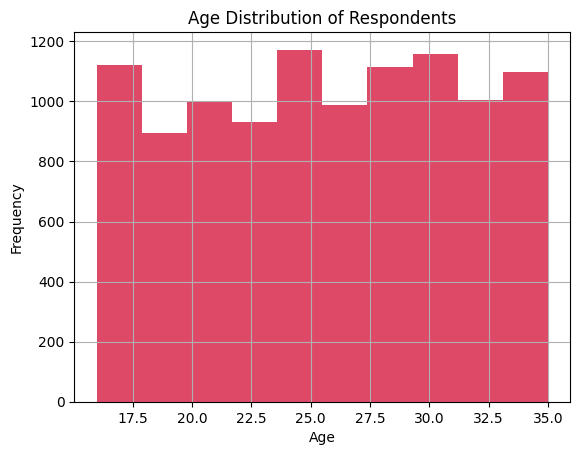

In [111]:
# Plot histogram with magma color map
import matplotlib.pyplot as plt

df['RespondentAge'].hist(color=plt.cm.magma(0.6))  # magma colormap shade
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Majority of respondents are from age 25 to 35

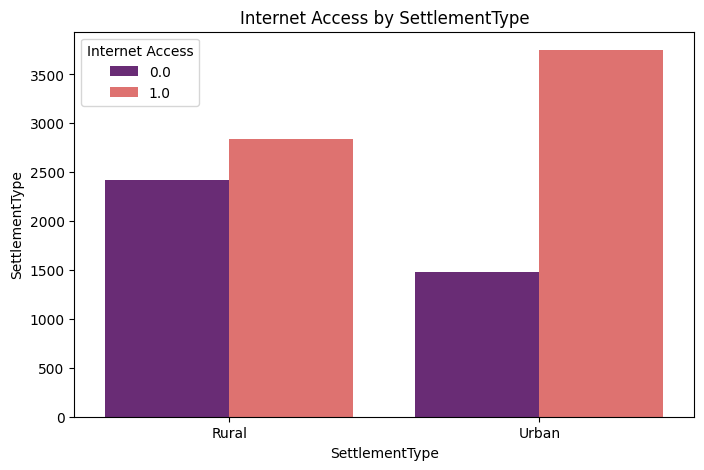

In [112]:
#Internet Access by SettlementType distribution plot
df.rename(columns={'CountyType': 'SettlementType'}, inplace=True)
plt.figure(figsize=(8, 5))
sns.countplot(x='SettlementType', hue='InternetAccess', data=df, palette='magma')
plt.title('Internet Access by SettlementType')
plt.xlabel('SettlementType')
plt.ylabel('SettlementType')
plt.legend(title='Internet Access')
plt.show()

<ipython-input-53-216142ed523c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index.astype(str), y=age_counts.values,palette='magma')


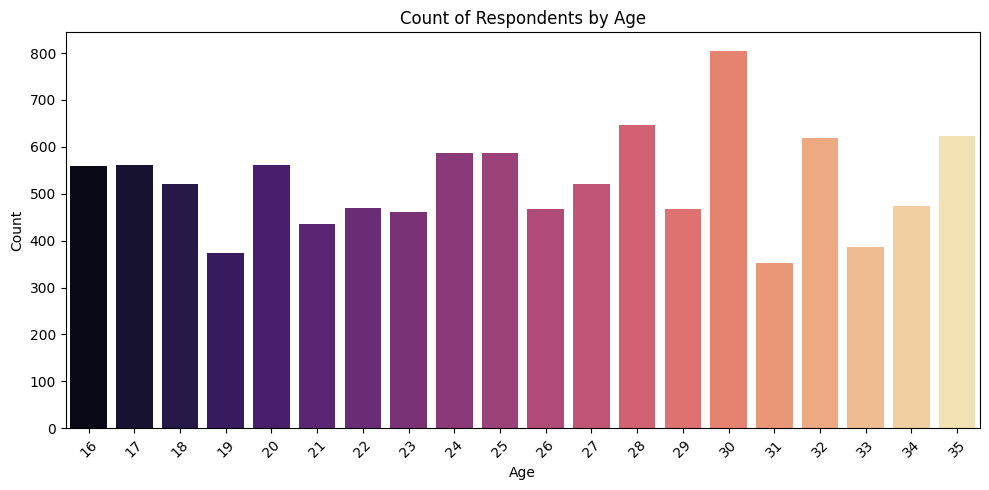

In [53]:
# checking age distribution across all genders
age_counts = df['RespondentAge'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=age_counts.index.astype(str), y=age_counts.values,palette='magma')
plt.title('Count of Respondents by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The highest number of respondents are aged 30 with a steady decline in participation as age increases

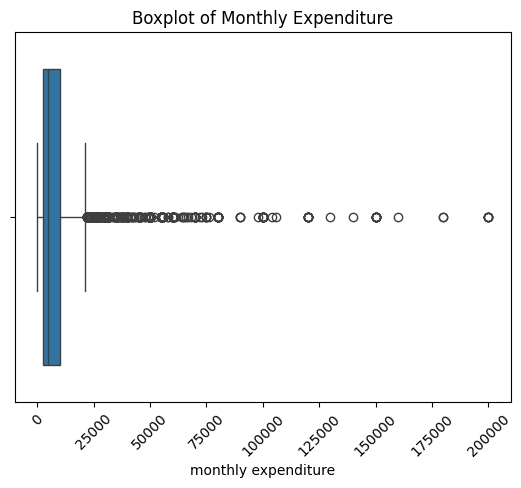

In [54]:
# monthly expenditure distribution
sns.boxplot(x=df['monthly expenditure'])
plt.title('Boxplot of Monthly Expenditure')
plt.xticks(rotation=45)
plt.show()

Monthly spending varies widely across individuals with a few individuals spendings  exceeding the typical range. Majority of respondents spend not more than Kes.75,000

<ipython-input-113-13edb0b26584>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GenderOfHouseholdMember', data=df, palette="magma")


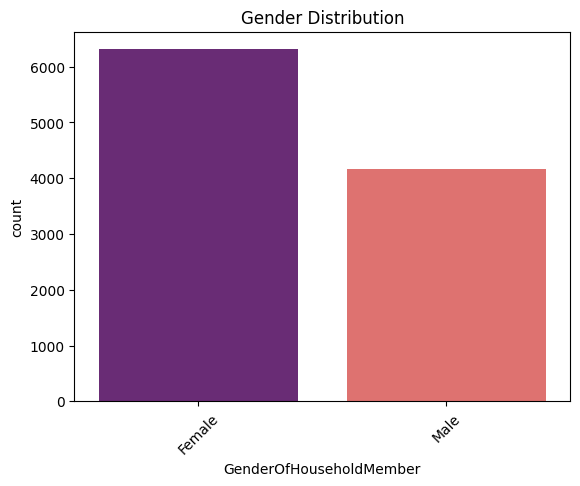

GenderOfHouseholdMember
Female    6310
Male      4169
Name: count, dtype: int64


In [113]:
# Gender distribution
sns.countplot(x='GenderOfHouseholdMember', data=df, palette="magma")
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.show()-

print(df['GenderOfHouseholdMember'].value_counts())

Most household respondents were females suggesting that either more women were willing to participate in the survey or the population of females is higher than male.

<ipython-input-104-b19a25ce661d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SelfEmployed', data=df, palette="magma")


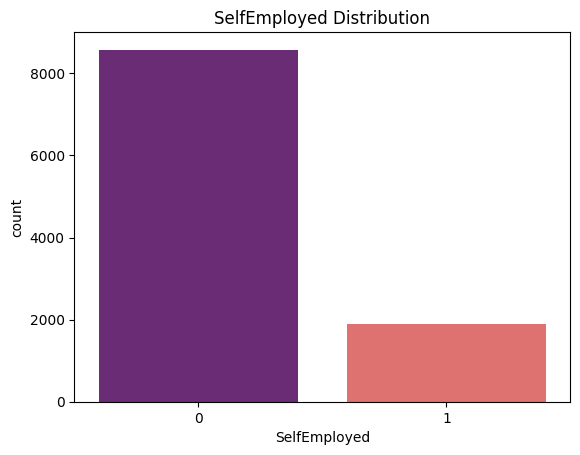

SelfEmployed
0    8577
1    1902
Name: count, dtype: int64


In [104]:
#SelfEmployment Distribution plot
sns.countplot(x='SelfEmployed', data=df, palette="magma")
plt.title('SelfEmployed Distribution')
plt.show()

print(df['SelfEmployed'].value_counts())

8577 respondent are not self employed where as 1902 are self employed. This implies that only 18.1% of the sample is self-employed

<ipython-input-114-c5bca6ef794f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ksh500 spend YoY comparison', data=df, palette="magma")


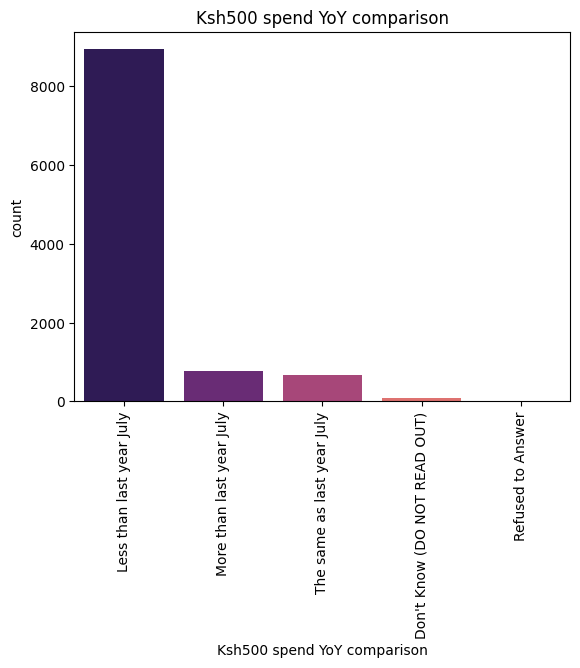

Ksh500 spend YoY comparison
Less than last year July        8934
More than last year July         775
The same as last year July       670
Don't Know (DO NOT READ OUT)      97
Refused to Answer                  3
Name: count, dtype: int64


In [114]:
#'Ksh500 spend YoY comparison Distribution plot
sns.countplot(x='Ksh500 spend YoY comparison', data=df, palette="magma")
plt.title('Ksh500 spend YoY comparison')
plt.xticks(rotation=90)
plt.show()

print(df['Ksh500 spend YoY comparison'].value_counts())

Most respondents(8934) stated that Ksh.500/= catered for less needs in 2024 compared to 2023.670 respondents stated that Kes.500 catered for the same needs as in 2023. Does this imply increase in the cost of living?

### BIVARIATE ANALYSIS

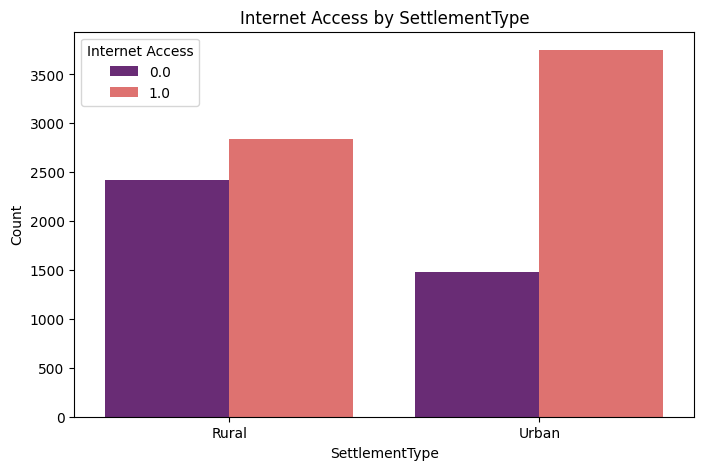

InternetAccess   0.0   1.0
SettlementType            
Rural           2417  2836
Urban           1477  3749


In [124]:
#Internet Access by County Type distribution plot
Count = df.groupby(['SettlementType', 'InternetAccess']).size().unstack()
plt.figure(figsize=(8, 5))
sns.countplot(x='SettlementType', hue='InternetAccess', data=df, palette='magma')
plt.title('Internet Access by SettlementType')
plt.xlabel('SettlementType')
plt.ylabel('Count')
plt.legend(title='Internet Access')
plt.show()
print(Count)

There is higher internet access in urban areas (3749 respondents) than in rural areas (2836 respondents)

In [117]:
## Access to bank/Financial Institution

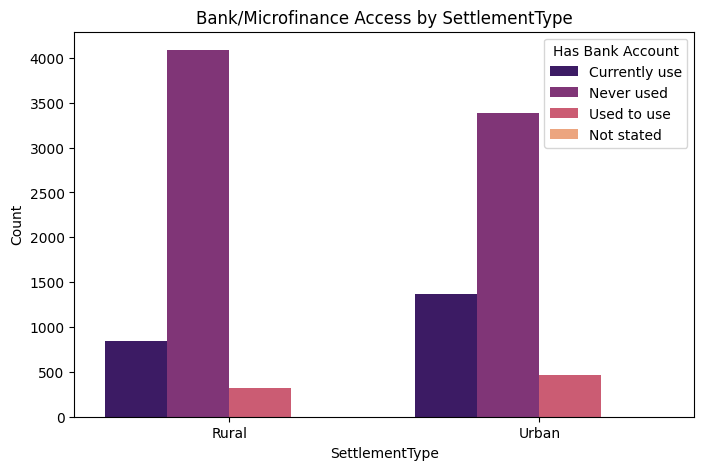

HasBankOrMicrofinanceAccount  Currently use  Never used  Not stated  \
SettlementType                                                        
Rural                                   840        4087           2   
Urban                                  1367        3390           1   

HasBankOrMicrofinanceAccount  Used to use  
SettlementType                             
Rural                                 324  
Urban                                 468  


In [125]:
#Bank/Microfinance Access by County Type plot
count = df.groupby(['SettlementType', 'HasBankOrMicrofinanceAccount']).size().unstack()
plt.figure(figsize=(8, 5))
sns.countplot(x='SettlementType', hue='HasBankOrMicrofinanceAccount', data=df, palette='magma')
plt.title('Bank/Microfinance Access by SettlementType')
plt.xlabel('SettlementType')
plt.ylabel('Count')
plt.legend(title='Has Bank Account')
plt.show()
print(count)



Only 840 respondents in rural areas are currently using Bank/Microfinance account, 4087 in rural areas have never used. 324 respondents in the rural areas used to use (nolonger using)

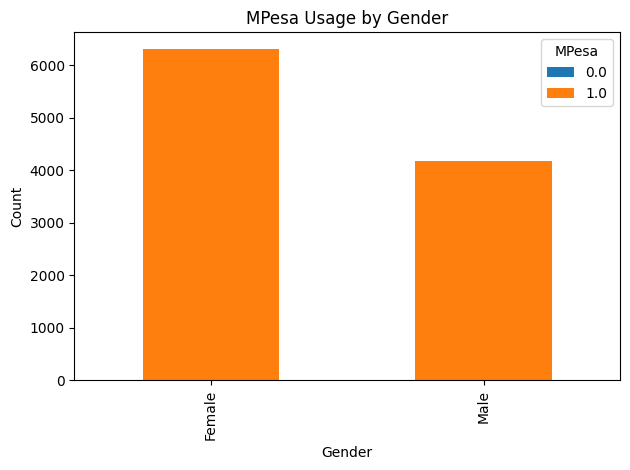

MPesa                    0.0   1.0
GenderOfHouseholdMember           
Female                    14  6296
Male                      13  4156


In [126]:
#Mpesa Usage by gender plot
count = pd.crosstab(df['GenderOfHouseholdMember'], df['MPesa'])
pd.crosstab(df['GenderOfHouseholdMember'], df['MPesa']).plot(kind='bar', stacked=True)
plt.title('MPesa Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='MPesa')
plt.tight_layout()
plt.show()
print(count)

More Females (6296) use Mpesa than male(4156)

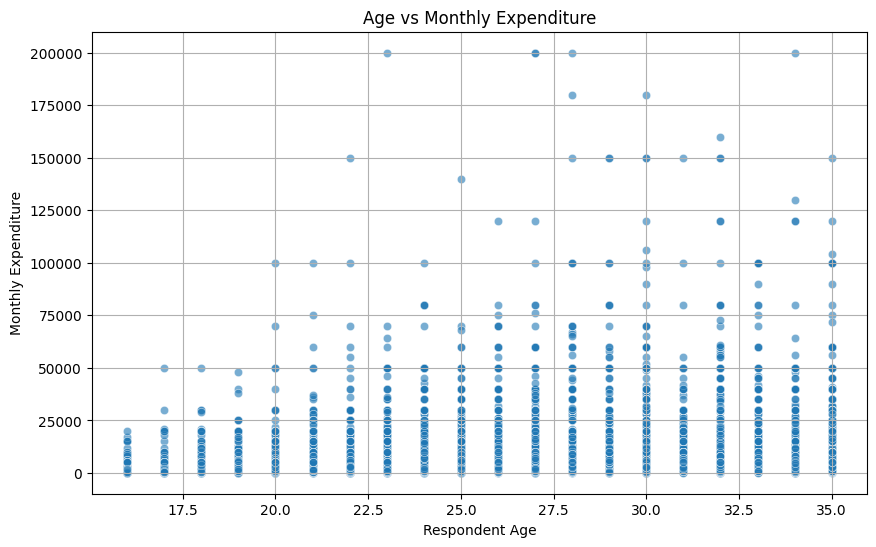

In [ ]:
# Age vs Monthly Expenditure plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='RespondentAge', y='monthly expenditure', data=df, alpha=0.6)
plt.title('Age vs Monthly Expenditure')
plt.xlabel('Respondent Age')
plt.ylabel('Monthly Expenditure')
plt.grid(True)
plt.show()

<Axes: xlabel='GenderOfHouseholdMember'>

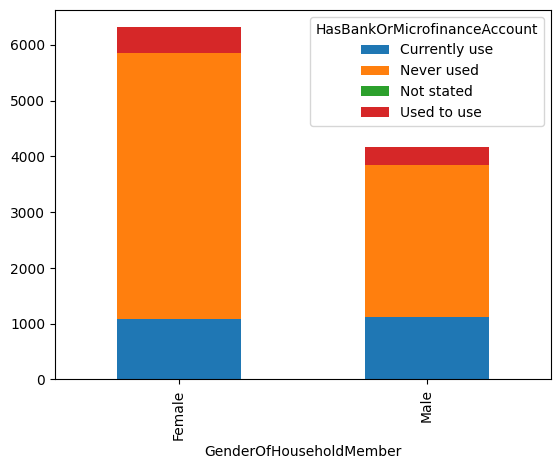

In [129]:
# Distribution of Bank/Microfinance Account Ownership across Genders plot
pd.crosstab(df['GenderOfHouseholdMember'],df['HasBankOrMicrofinanceAccount']).plot(kind='bar', stacked=True)

<Axes: xlabel='GenderOfHouseholdMember'>

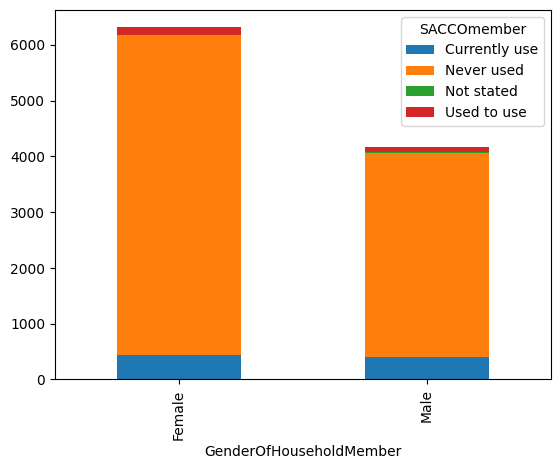

In [ ]:
#Distribution of SACCOmember usage across Genders plot
pd.crosstab(df['GenderOfHouseholdMember'], df['SACCOmember']).plot(kind='bar', stacked=True)

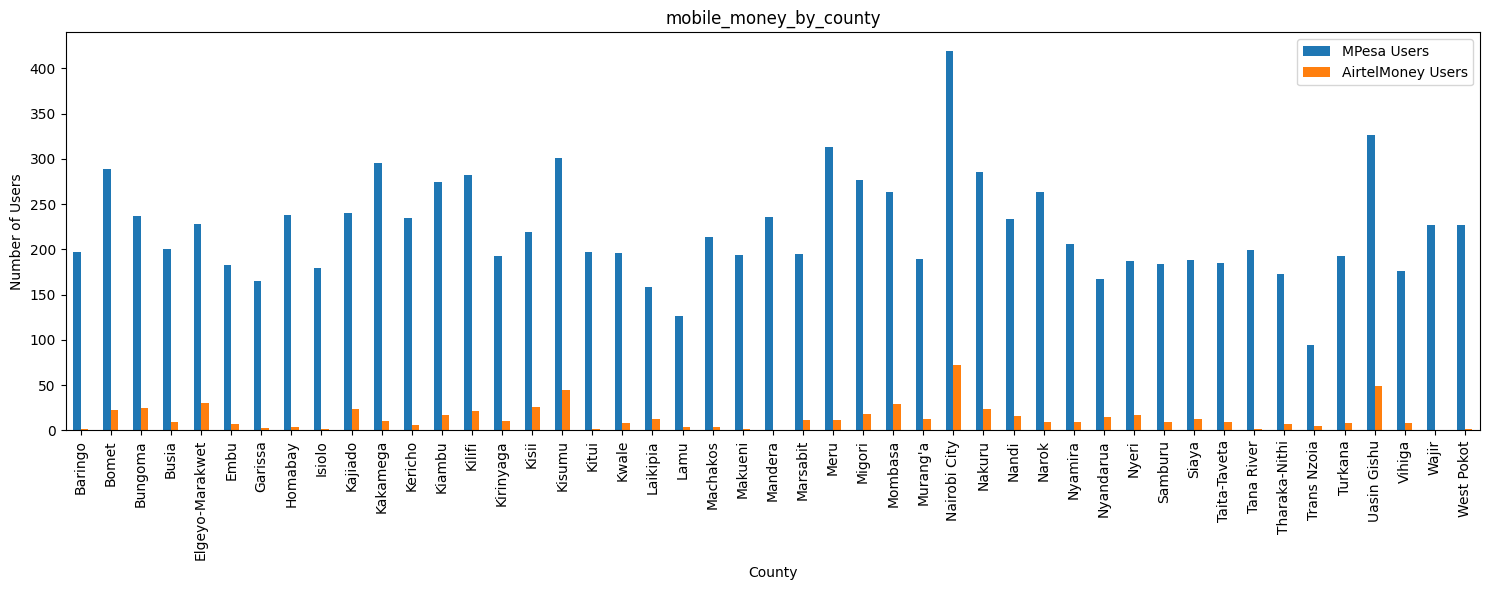

In [ ]:
#mobile money usage across all counties
mobile_money_by_county = df.groupby('County')[['MPesa', 'AirtelMoney']].sum()

mobile_money_by_county.plot(kind='bar',stacked=False, figsize=(15, 6))
plt.title('mobile_money_by_county')
plt.ylabel('Number of Users')
plt.xlabel('County')
plt.xticks(rotation=90)
plt.legend(['MPesa Users', 'AirtelMoney Users'])
plt.tight_layout()
plt.show()


## MULTIVARIATE ANALYSIS

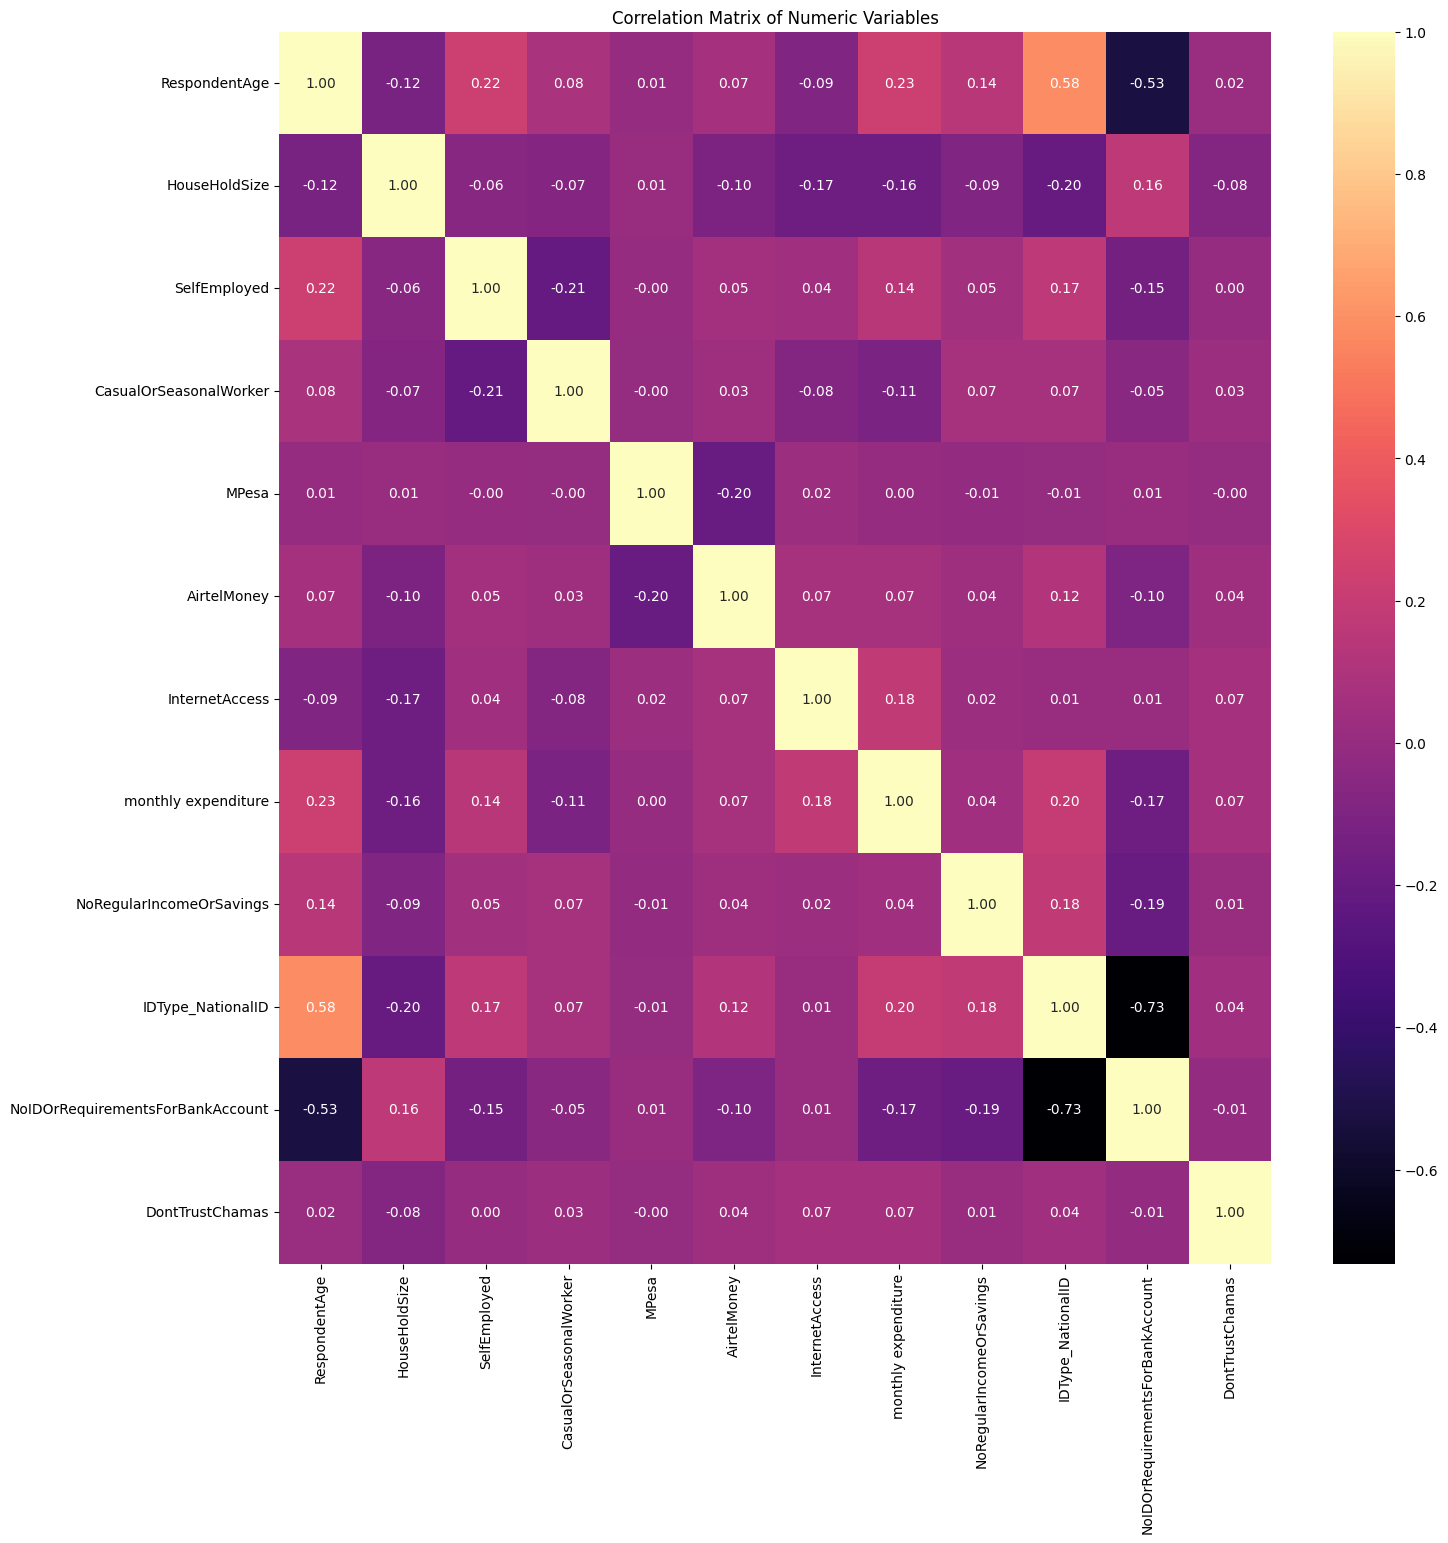

In [ ]:
#Correlation matrix for numeric variables
numeric_df = df.select_dtypes(include='number')
#Computing correlation matrix
correlation_matrix = numeric_df.corr()

#heatmap plotting
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

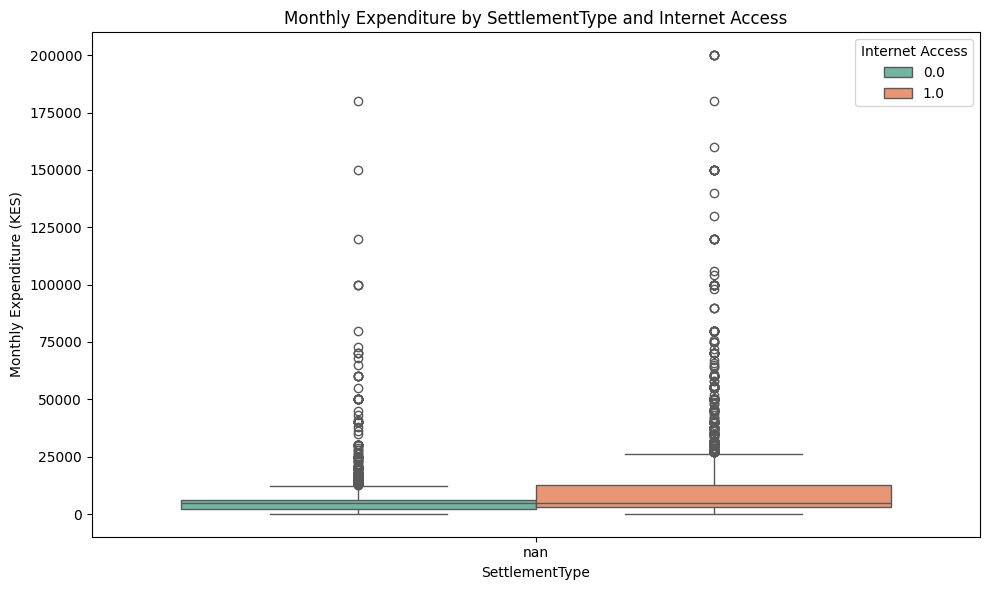

In [ ]:
# Box plot for monthly expenditure by county type and Internet Access
plt.figure(figsize=(10, 6))
sns.boxplot(x='SettlementType', y='monthly expenditure', hue='InternetAccess', data=df, palette='Set2')
plt.title('Monthly Expenditure by SettlementType and Internet Access')
plt.xlabel('SettlementType')
plt.ylabel('Monthly Expenditure (KES)')
plt.legend(title='Internet Access')
plt.tight_layout()
plt.show()


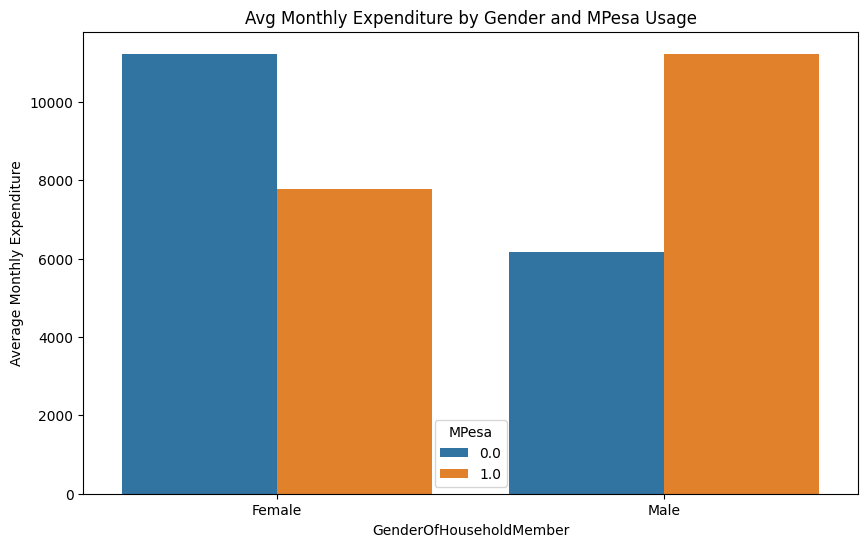

  GenderOfHouseholdMember  MPesa  monthly expenditure
0                  Female    0.0         11214.285714
1                  Female    1.0          7776.486182
2                    Male    0.0          6169.230769
3                    Male    1.0         11233.670115


In [130]:
# Average Monthly Expenditure by Gender and M-Pesa Usage plot
grouped = df.groupby(['GenderOfHouseholdMember','MPesa'])['monthly expenditure'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='GenderOfHouseholdMember', y='monthly expenditure', hue='MPesa', data=grouped)
plt.title('Avg Monthly Expenditure by Gender and MPesa Usage')
plt.ylabel('Average Monthly Expenditure')
plt.show()
print(grouped)

Females using Mpesa spent Kes.7,776 per month,where as Male using Mpesa spent Kes.11,233

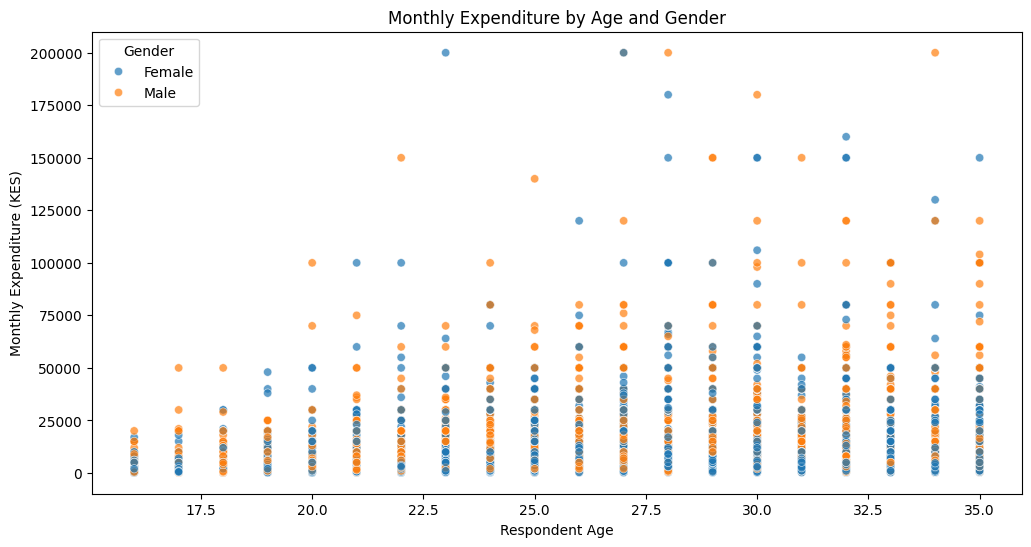

In [ ]:
#Monthly Expenditure by Age and Gender plot
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='RespondentAge', y='monthly expenditure', hue='GenderOfHouseholdMember', alpha=0.7)
plt.title('Monthly Expenditure by Age and Gender')
plt.xlabel('Respondent Age')
plt.ylabel('Monthly Expenditure (KES)')
plt.legend(title='Gender')
plt.show()


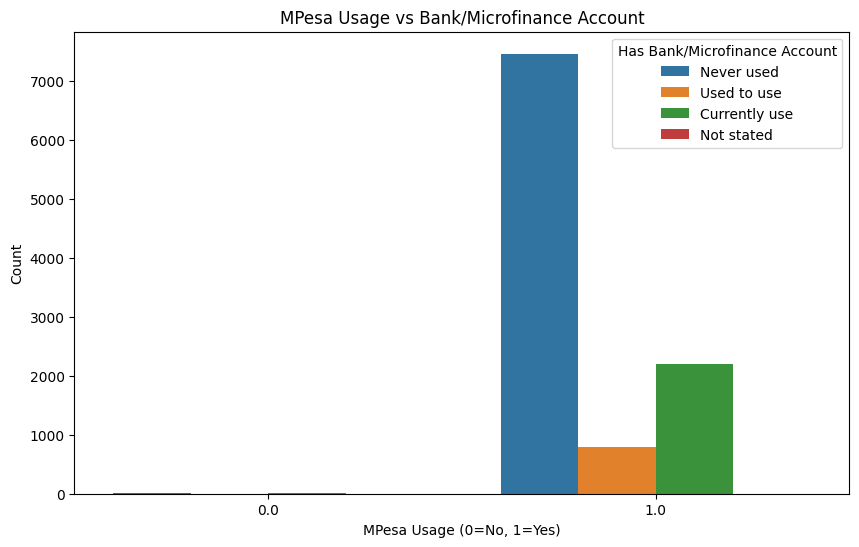

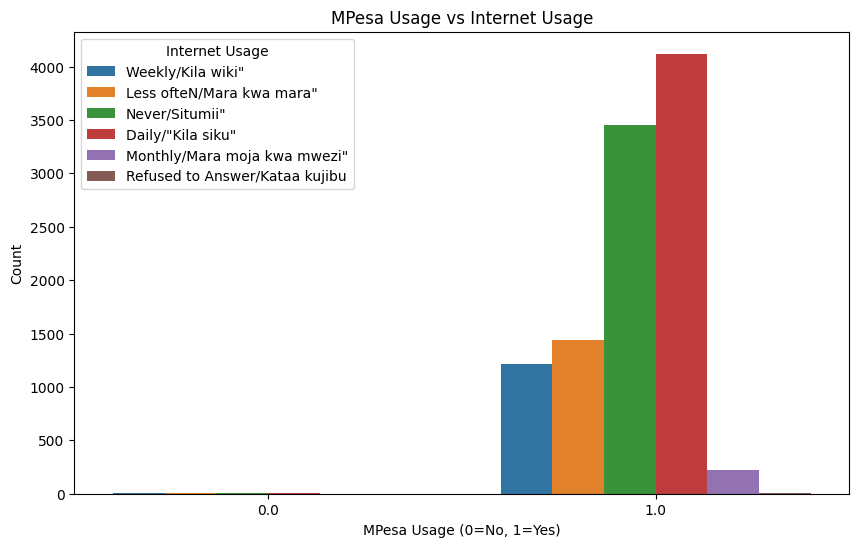

In [133]:
#MPesa Usage vs Bank/Microfinance Account
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='MPesa', hue='HasBankOrMicrofinanceAccount')
plt.title('MPesa Usage vs Bank/Microfinance Account')
plt.xlabel('MPesa Usage (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Has Bank/Microfinance Account')
plt.show()

# MPesa Usage vs Internet Usage
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='MPesa', hue='InternetUsage')
plt.title('MPesa Usage vs Internet Usage')
plt.xlabel('MPesa Usage (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Internet Usage')
plt.show()


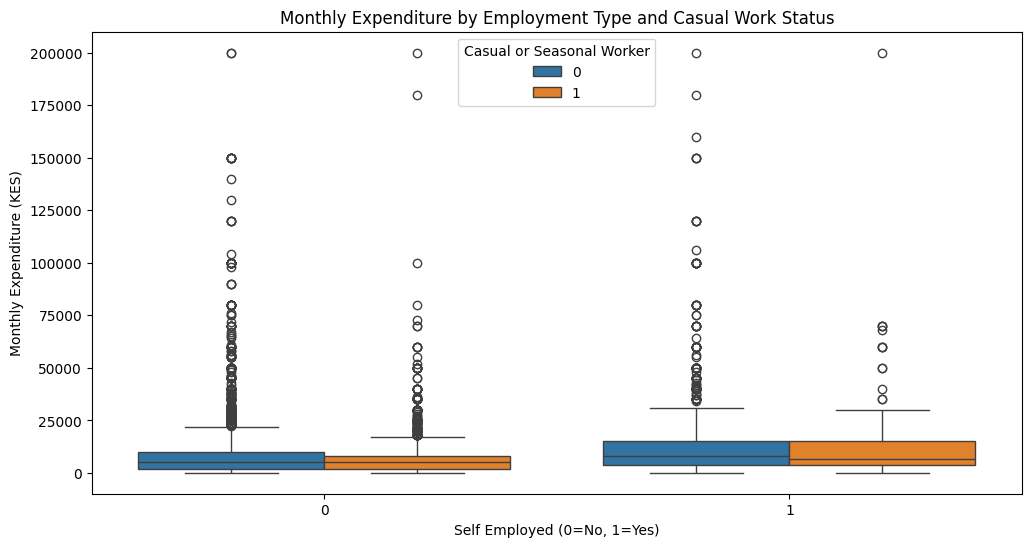

In [ ]:
#Monthly Expenditure by Employment Type and Casual Work Status
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='SelfEmployed', y='monthly expenditure', hue='CasualOrSeasonalWorker')
plt.title('Monthly Expenditure by Employment Type and Casual Work Status')
plt.xlabel('Self Employed (0=No, 1=Yes)')
plt.ylabel('Monthly Expenditure (KES)')
plt.legend(title='Casual or Seasonal Worker')
plt.show()


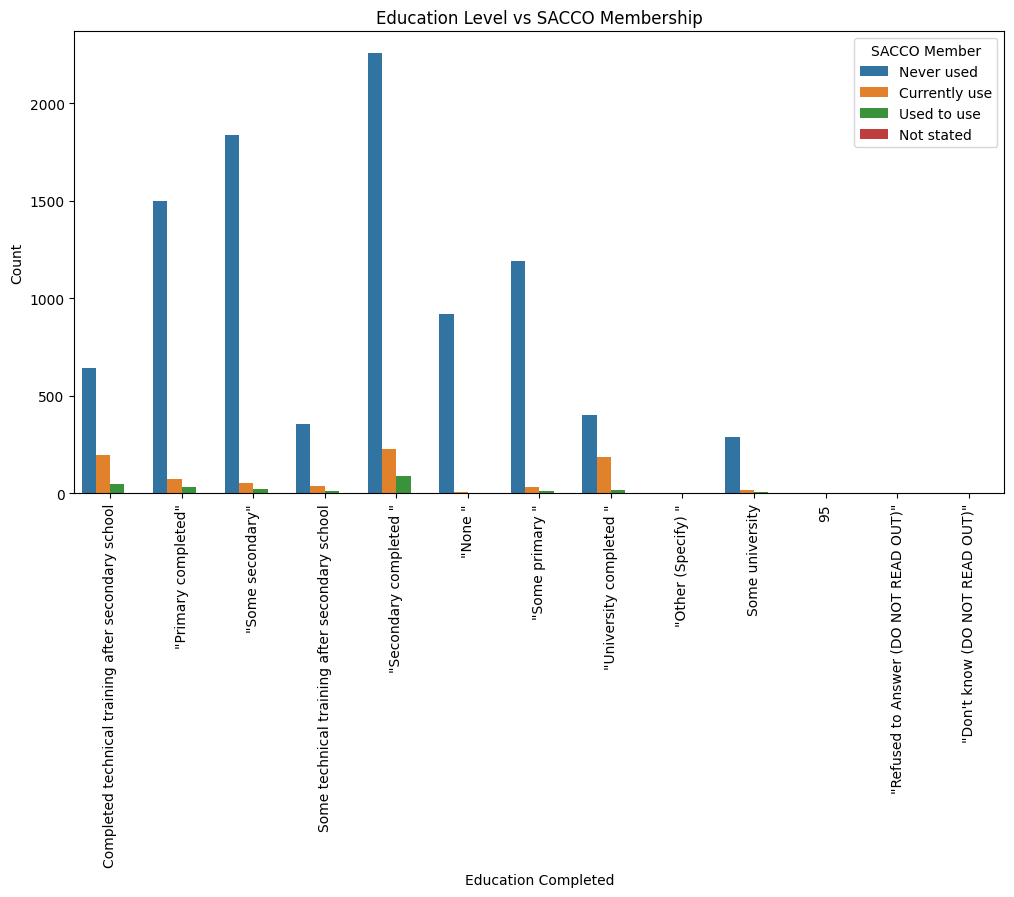

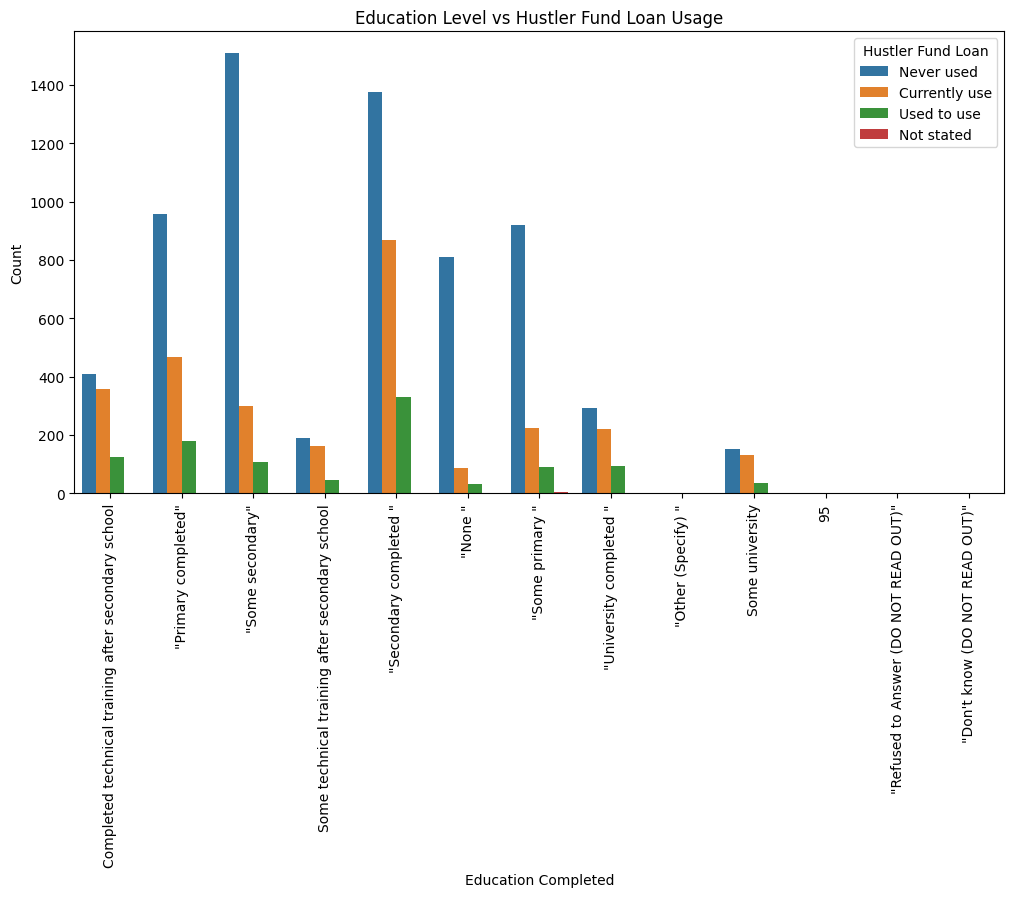

In [ ]:
#Education Level vs SACCO Membership plot
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='EducationCompleted', hue='SACCOmember')
plt.title('Education Level vs SACCO Membership')
plt.xlabel('Education Completed')
plt.ylabel('Count')
plt.legend(title='SACCO Member')
plt.xticks(rotation=90)
plt.show()

#Education Level vs Hustler Fund Loan Usage
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='EducationCompleted', hue='HustlerFundLoan')
plt.title('Education Level vs Hustler Fund Loan Usage')
plt.xlabel('Education Completed')
plt.ylabel('Count')
plt.legend(title='Hustler Fund Loan')
plt.xticks(rotation=90)
plt.show()




<ipython-input-123-ce824a564001>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='County', y='monthly expenditure', estimator=np.mean, ci=None)


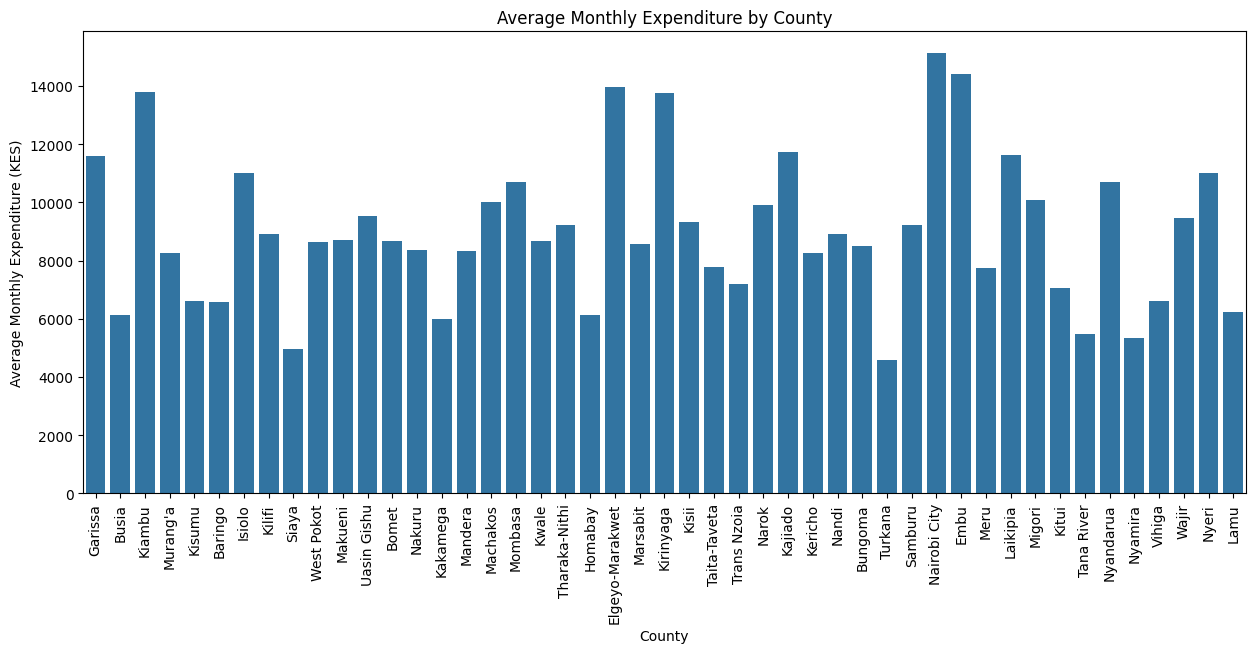

In [ ]:
#Average Monthly Expenditure by County
plt.figure(figsize=(15,6))
sns.barplot(data=df, x='County', y='monthly expenditure', estimator=np.mean, ci=None)
plt.title('Average Monthly Expenditure by County')
plt.xlabel('County')
plt.ylabel('Average Monthly Expenditure (KES)')
plt.xticks(rotation=90)
plt.show()


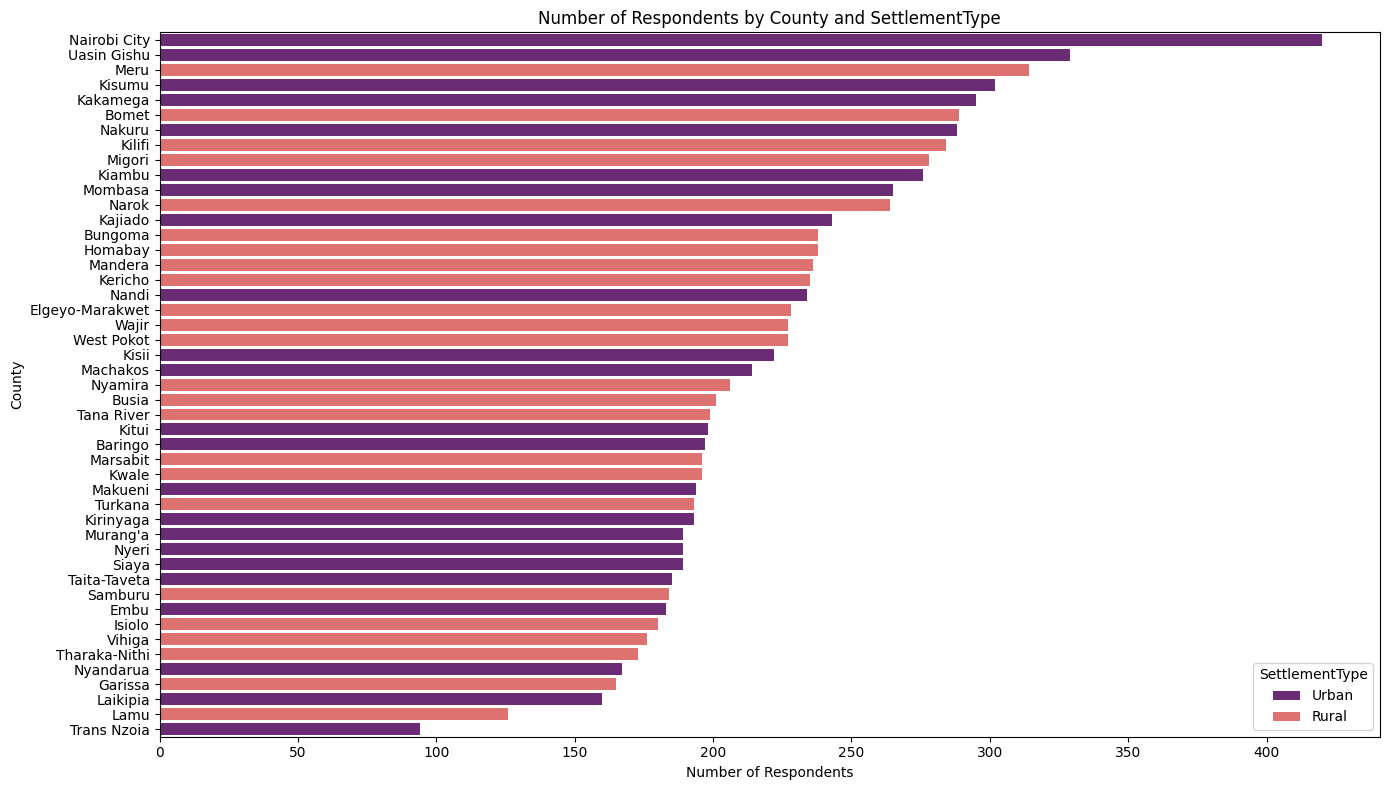

In [96]:
# Grouping the data by County and SettlementType
county_df = df.groupby(['County', 'SettlementType']).size().reset_index(name='Count')

# Number of Respondents by County and SettlementType plot
plt.figure(figsize=(14, 8))
sns.barplot(data=county_df.sort_values('Count', ascending=False), x='Count', y='County', hue='SettlementType',dodge=False,palette='magma')

plt.title('Number of Respondents by County and SettlementType')
plt.xlabel('Number of Respondents')
plt.ylabel('County')
plt.legend(title='SettlementType')
plt.tight_layout()
plt.show()

##DATA PREPROCESSING

###Feature Engineering

creating meaningful features

Is_Financially_Included into binary target: 1 = included, 0 = excluded

Convert:

Has_ID, Has_Phone into binary format

GenderOfHouseholdMember, EducationCompleted, County → categorical features

Filter RespondentAge: focus on youth aged 18–35 (urban & rural)

Add a Youth_Group label: Rural Youth, Urban Youth, Not Youth

In [136]:
#Creating binary target column for financial inclusion
df['Is_Financially_Included'] = ((df['HasBankOrMicrofinanceAccount'] == 1) | (df['MPesa'] == 1)).astype(int)

print(df['Is_Financially_Included'].value_counts())
print(df['Is_Financially_Included'].value_counts(normalize=True))

Is_Financially_Included
1    10452
0       27
Name: count, dtype: int64
Is_Financially_Included
1    0.997423
0    0.002577
Name: proportion, dtype: float64


In [139]:
print(df['Is_Financially_Included'])

0        1
1        1
2        1
3        1
4        1
        ..
10474    1
10475    1
10476    1
10477    1
10478    1
Name: Is_Financially_Included, Length: 10479, dtype: int64


In [140]:
df['Has_ID'] = df['IDType_NationalID'].apply(lambda x: 1 if x == 1 else 0)
df['Has_Phone'] = df['MPesa'].apply(lambda x: 1 if x == 1 else 0)
print(df[['Has_ID', 'Has_Phone']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Has_ID     10479 non-null  int64
 1   Has_Phone  10479 non-null  int64
dtypes: int64(2)
memory usage: 163.9 KB
None


In [141]:
# Filter for youth (age 18-35)
df_youth = df[(df['RespondentAge'] >= 18) & (df['RespondentAge'] <= 35)].copy()

# Create Youth_Group label
df_youth['Youth_Group'] = df_youth['SettlementType'].apply(lambda x: f"{x} Youth")

#Create a combined dataframe with all respondents and the 'Not Youth' label
df['Youth_Group'] = 'Not Youth'
df.loc[(df['RespondentAge'] >= 18) & (df['RespondentAge'] <= 35), 'Youth_Group'] = df.loc[(df['RespondentAge'] >= 18) & (df['RespondentAge'] <= 35), 'SettlementType'].apply(lambda x: f"{x} Youth")

# Display the value counts for the new 'Youth_Group' column
print(df['Youth_Group'].value_counts())

# Display the first few rows of the filtered youth dataframe
print(df_youth[['RespondentAge', 'SettlementType', 'Youth_Group']].head())

Youth_Group
Urban Youth    4693
Rural Youth    4665
Not Youth      1121
Name: count, dtype: int64
   RespondentAge SettlementType  Youth_Group
0             29          Rural  Rural Youth
1             35          Rural  Rural Youth
2             24          Urban  Urban Youth
3             20          Urban  Urban Youth
4             27          Urban  Urban Youth


In [144]:
## Summarizing key columns for the youth group
youth_summary = df_youth[['RespondentAge', 'GenderOfHouseholdMember', 'EducationCompleted', 'County', 'Has_ID', 'Has_Phone', 'Is_Financially_Included', 'Youth_Group']].describe(include='all')

print("Summary for Youth Group:")
print(youth_summary)

# Show the distribution of the new 'Youth_Group' label within the youth dataset
print("\nDistribution of Youth Groups within the Youth Dataset:")
print(df_youth['Youth_Group'].value_counts())

print("\nProportion of Youth Groups within the Youth Dataset:")
print(df_youth['Youth_Group'].value_counts(normalize=True))

Summary for Youth Group:
        RespondentAge GenderOfHouseholdMember      EducationCompleted  \
count     9358.000000                    9358                    9358   
unique            NaN                       2                      13   
top               NaN                  Female  "Secondary completed "   
freq              NaN                    5723                    2525   
mean        26.711691                     NaN                     NaN   
std          5.104091                     NaN                     NaN   
min         18.000000                     NaN                     NaN   
25%         22.000000                     NaN                     NaN   
50%         27.000000                     NaN                     NaN   
75%         31.000000                     NaN                     NaN   
max         35.000000                     NaN                     NaN   

              County       Has_ID    Has_Phone  Is_Financially_Included  \
count           9358  9

**Key Insights**


**High Mobile and Financial Access** Nearly all youth have mobile phones and are financially included, this is a strong foundation for digital financial services, mobile banking, or e-commerce interventions.

**Gender Imbalance** Females make up a larger proportion of the youth dataset, which may reflect sampling or underlying population structure.

**Educational Reach** The dominant education level being “Secondary completed” suggests a moderately educated youth group, which can influence employment and tech adoption.

**Urban–Rural Balance** The dataset is well-balanced between urban and rural youth — useful for comparing trends like digital access, income, or financial behavior by location.

In [143]:
youth_summary.head()

,RespondentAge,GenderOfHouseholdMember,EducationCompleted,County,Has_ID,Has_Phone,Is_Financially_Included,Youth_Group
count,9358.000000,9358,9358,9358,9358.000000,9358.000000,9358.000000,9358
unique,NaN,2,13,47,NaN,NaN,NaN,2
top,NaN,Female,"""Secondary completed """,Nairobi City,NaN,NaN,NaN,Urban Youth
freq,NaN,5723,2525,411,NaN,NaN,NaN,4693
mean,26.711691,NaN,NaN,NaN,0.889506,0.997222,0.997222,NaN


##Creating new features to improve predictive power

Is_Employed - based on self-employed or casual worker

Digital_Readiness - based on HasPhone or HasID

Income_Bracket = Bin income to Low/Medium/High

In [145]:
# Is_Employed: Based on SelfEmployed or CasualOrSeasonalWorker
df['Is_Employed'] = ((df['SelfEmployed'] == 1) | (df['CasualOrSeasonalWorker'] == 1)).astype(int)

# Digital_Readiness: Has_Phone * Has_ID
df['Digital_Readiness'] = df['Has_Phone'] * df['Has_ID']

# Income_Bracket: Bin monthly expenditure
# Define bins and labels
# Using quantiles to create bins based on the distribution of the data
low_income_quantile = df['monthly expenditure'].quantile(0.33)
high_income_quantile = df['monthly expenditure'].quantile(0.67)

bins = [-float('inf'), low_income_quantile, high_income_quantile, float('inf')]
labels = ['Low', 'Medium', 'High']

df['Income_Bracket'] = pd.cut(df['monthly expenditure'], bins=bins, labels=labels, include_lowest=True)

# Display the first few rows with the new features
print(df[['SelfEmployed', 'CasualOrSeasonalWorker', 'Is_Employed', 'Has_Phone', 'Has_ID', 'Digital_Readiness', 'monthly expenditure', 'Income_Bracket']].head())

# Display value counts for the new categorical features
print("\nValue counts for Is_Employed:")
print(df['Is_Employed'].value_counts())

print("\nValue counts for Digital_Readiness:")
print(df['Digital_Readiness'].value_counts())

print("\nValue counts for Income_Bracket:")
print(df['Income_Bracket'].value_counts())

   SelfEmployed  CasualOrSeasonalWorker  Is_Employed  Has_Phone  Has_ID  \
0             0                       0            0          1       1   
1             0                       1            1          1       1   
2             0                       1            1          1       1   
3             0                       0            0          1       1   
4             0                       1            1          1       1   

   Digital_Readiness  monthly expenditure Income_Bracket  
0                  1              30000.0           High  
1                  1               3000.0            Low  
2                  1              10000.0           High  
3                  1              10000.0           High  
4                  1               1500.0            Low  

Value counts for Is_Employed:
Is_Employed
0    5307
1    5172
Name: count, dtype: int64

Value counts for Digital_Readiness:
Digital_Readiness
1    8445
0    2034
Name: count, dtype: int64

Valu

**Insights**

**High Digital Access** With 90% digital readiness and 99% phone ownership, meaning youth are well positioned for mobile-based programs (e.g., mobile learning, job-matching, digital finance).

**Employment is Mixed** Nearly half are unemployed. This may point to opportunities for upskilling or job placement initiatives.

**Income Diversity** The economic spread suggests different policy or business strategies may be needed to serve low and high-income youth effectively.

***Interaction Features***

#####Age and InternetAccess and Income_Bracket and SettlementType
Age and InternetAccess: The effect of age on financial inclusion might depend on internet access

Income_Bracket and SettlementType: The relationship between income bracket and financial inclusion might differ between urban and rural areas

In [148]:
# Creating an interaction feature: Age and InternetAccess
# Hypothesis: The effect of age on financial inclusion might depend on internet access.
df['Age_x_InternetAccess'] = df['RespondentAge'] * df['InternetAccess']

# Creating an interaction feature: Income_Bracket and SettlementType
# Hypothesis: The relationship between income bracket and financial inclusion might differ between urban and rural areas.
df['Income_Bracket'] = df['Income_Bracket'].astype(str)
df['SettlementType'] = df['SettlementType'].astype(str)

# Create dummy variables for each combination of Income_Bracket and SettlementType
income_county_interaction = pd.get_dummies(df['Income_Bracket'])
income_county_interaction.columns = [f'Income_{col}' for col in income_county_interaction.columns]

SettlementType_interaction = pd.get_dummies(df['SettlementType'])
SettlementType_interaction.columns = [f'County_{col}' for col in SettlementType_interaction.columns]


# Concatenate the dummy variables
interaction_dummies = pd.concat([income_county_interaction, SettlementType_interaction], axis=1)

# Display the first few rows with the new interaction features
print(df[['RespondentAge', 'InternetAccess', 'Age_x_InternetAccess', 'Income_Bracket', 'SettlementType']].head())
print("\nInteraction Dummies (Income_Bracket x SettlementType):")
print(interaction_dummies.head())

# Creating interaction term for 'High Income' and 'Urban County'
df['HighIncome_Urban'] = ((df['Income_Bracket'] == 'High') & (df['SettlementType'] == 'Urban')).astype(int)
df['HighIncome_Rural'] = ((df['Income_Bracket'] == 'High') & (df['SettlementType'] == 'Rural')).astype(int)
df['MediumIncome_Urban'] = ((df['Income_Bracket'] == 'Medium') & (df['SettlementType'] == 'Urban')).astype(int)
df['MediumIncome_Rural'] = ((df['Income_Bracket'] == 'Medium') & (df['SettlementType'] == 'Rural')).astype(int)
df['LowIncome_Urban'] = ((df['Income_Bracket'] == 'Low') & (df['SettlementType'] == 'Urban')).astype(int)
df['LowIncome_Rural'] = ((df['Income_Bracket'] == 'Low') & (df['SettlementType'] == 'Rural')).astype(int)

print("\nExplicit Dummy Interaction Features (Income_Bracket x SettlementType):")
print(df[['Income_Bracket', 'SettlementType', 'HighIncome_Urban', 'HighIncome_Rural', 'MediumIncome_Urban', 'MediumIncome_Rural', 'LowIncome_Urban', 'LowIncome_Rural']].head())
df.info()

   RespondentAge  InternetAccess  Age_x_InternetAccess Income_Bracket  \
0             29             1.0                  29.0           High   
1             35             0.0                   0.0            Low   
2             24             0.0                   0.0           High   
3             20             1.0                  20.0           High   
4             27             1.0                  27.0            Low   

  SettlementType  
0          Rural  
1          Rural  
2          Urban  
3          Urban  
4          Urban  

Interaction Dummies (Income_Bracket x SettlementType):
   Income_High  Income_Low  Income_Medium  County_Rural  County_Urban
0         True       False          False          True         False
1        False        True          False          True         False
2         True       False          False         False          True
3         True       False          False         False          True
4        False        True          False

#####Rural × Education and Age × Income
Rural × Education-Rural areas with low education might face compounding exclusion barriers

Age × Income-Income at different ages may signal stability or exclusion risk

In [149]:
# Rural x Education: The effect of education level on financial inclusion might differ between urban and rural areas.
# Create dummy variables for each combination of EducationCompleted and SettlementType (focusing on the 'Rural' interaction)
df['EducationCompleted'] = df['EducationCompleted'].astype(str)

education_rural_interaction = pd.get_dummies(df['EducationCompleted'], prefix='Education')
education_rural_interaction = education_rural_interaction.multiply(df['SettlementType'].apply(lambda x: 1 if x == 'Rural' else 0), axis=0)
education_rural_interaction.columns = [f'Rural_x_{col}' for col in education_rural_interaction.columns]


# Age x Income: The effect of age on financial inclusion might depend on the income bracket.
# This can be represented by multiplying age (continuous) with dummy variables for each income bracket.
income_dummy = pd.get_dummies(df['Income_Bracket'], prefix='Income')

age_income_interaction = income_dummy.multiply(df['RespondentAge'], axis=0)
age_income_interaction.columns = [f'Age_x_{col}' for col in age_income_interaction.columns]


# Concatenate the new interaction features to the dataframe
df = pd.concat([df, education_rural_interaction, age_income_interaction], axis=1)

# Display the first few rows with the new interaction features
print(df[['RespondentAge', 'Income_Bracket', 'SettlementType', 'EducationCompleted']].head())
print("\nRural x Education Interaction Features:")
print(education_rural_interaction.head())
print("\nAge x Income Interaction Features:")
print(age_income_interaction.head())

df.info()

   RespondentAge Income_Bracket SettlementType  \
0             29           High          Rural   
1             35            Low          Rural   
2             24           High          Urban   
3             20           High          Urban   
4             27            Low          Urban   

                                  EducationCompleted  
0  Completed technical training after secondary s...  
1                                "Primary completed"  
2                                   "Some secondary"  
3     Some technical training after secondary school  
4                                "Primary completed"  

Rural x Education Interaction Features:
   Rural_x_Education_"Don't know (DO NOT READ OUT)"  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0  

####One-Hot Encode Categorical Features

In [151]:
# Selecting the categorical columns to encode
categorical_cols = ['GenderOfHouseholdMember', 'EducationCompleted', 'County']

# Applying one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Displaying the first few rows of the new dataframe to see the encoded columns
print(df_encoded.head())

# Displaying the new shape to see the increase in columns
print("\nOriginal shape:", df.shape)
print("Shape after one-hot encoding:", df_encoded.shape)

   RespondentAge                MaritalStatus  HouseHoldSize  SelfEmployed  \
0             29  Married/Living with partner              5             0   
1             35           Divorced/separated              2             0   
2             24         Single/Never Married              1             0   
3             20         Single/Never Married              1             0   
4             27  Married/Living with partner              4             0   

   CasualOrSeasonalWorker HasBankOrMicrofinanceAccount  MPesa  AirtelMoney  \
0                       0                Currently use    1.0          0.0   
1                       1                   Never used    1.0          0.0   
2                       1                   Never used    1.0          0.0   
3                       0                Currently use    1.0          1.0   
4                       1                   Never used    1.0          0.0   

  SACCOmember HustlerFundLoan  ... County_Siaya County_Taita-T

###STANDADIZATION AND NORMALIZATION

In [152]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
# Select the numeric columns you want to normalize/standardize
numeric_cols_for_scaling = [
    'RespondentAge',
    'monthly expenditure',
    'AvgTransportCostToFinancialProvider',
    'HouseHoldSize'
]

# checking if these columns exist in my dataframe after preprocessing
numeric_cols_for_scaling = [col for col in numeric_cols_for_scaling if col in df_encoded.columns]

# Data Cleaning for Numeric Columns
# Checking to convert 'AvgTransportCostToFinancialProvider' to numeric
# Use errors='coerce' to turn non-numeric values into NaN
df_encoded['AvgTransportCostToFinancialProvider'] = pd.to_numeric(df_encoded['AvgTransportCostToFinancialProvider'], errors='coerce')

# Handling potential NaN values introduced by coercion
#Fill NaN with the median (as done previously for monthly expenditure)
median_avg_transport_cost = df_encoded['AvgTransportCostToFinancialProvider'].median()
df_encoded['AvgTransportCostToFinancialProvider'] = df_encoded['AvgTransportCostToFinancialProvider'].fillna(median_avg_transport_cost)

#Dropping rows with NaN in this specific column (less recommended as it loses data)
# df_encoded.dropna(subset=['AvgTransportCostToFinancialProvider'], inplace=True)


# Verifying the data types of the numeric columns before scaling
print("Data types of columns to be scaled:")
print(df_encoded[numeric_cols_for_scaling].dtypes)


#Standardization
# Initializing the StandardScaler
scaler_std = StandardScaler()

# Fit and transform the selected numeric columns
df_encoded[numeric_cols_for_scaling] = scaler_std.fit_transform(df_encoded[numeric_cols_for_scaling])

print("\nDataFrame after Standardization:")
print(df_encoded[numeric_cols_for_scaling].head())

#Normalization (Min-Max Scaling)
# Initialize the MinMaxScaler
scaler_minmax = MinMaxScaler()

# Fit and transform the selected numeric columns

#Applying Min-Max to the original dataframe's numeric columns (before standardization)
# df_original_numeric = df[numeric_cols_for_scaling].copy()
# scaler_minmax = MinMaxScaler()
# df_original_numeric_normalized = scaler_minmax.fit_transform(df_original_numeric)
# df_normalized_separate = df_encoded.copy()
# df_normalized_separate[numeric_cols_for_scaling] = df_original_numeric_normalized


# Applying Min-Max scaling to the already standardized data (less common)
# df_encoded[numeric_cols_for_scaling] = scaler_minmax.fit_transform(df_encoded[numeric_cols_for_scaling])
print("\nDataFrame after applying Min-Max scaling on standardized data:")
print(df_encoded[numeric_cols_for_scaling].head())


#Applying Min-Max scaling instead of Standardization
# scaler_minmax = MinMaxScaler()
# df_encoded[numeric_cols_for_scaling] = scaler_minmax.fit_transform(df_encoded[numeric_cols_for_scaling])
# print("\nDataFrame after Min-Max Scaling:")
# print(df_encoded[numeric_cols_for_scaling].head())

# standardized values for 'RespondentAge', 'monthly expenditure',

Data types of columns to be scaled:
RespondentAge                            int64
monthly expenditure                    float64
AvgTransportCostToFinancialProvider    float64
HouseHoldSize                            int64
dtype: object

DataFrame after Standardization:
   RespondentAge  monthly expenditure  AvgTransportCostToFinancialProvider  \
0       0.586279             1.504087                                  NaN   
1       1.626836            -0.443672                                  NaN   
2      -0.280851             0.061303                                  NaN   
3      -0.974556             0.061303                                  NaN   
4       0.239427            -0.551880                                  NaN   

   HouseHoldSize  
0       0.248473  
1      -0.945543  
2      -1.343548  
3      -1.343548  
4      -0.149532  

DataFrame after applying Min-Max scaling on standardized data:
   RespondentAge  monthly expenditure  AvgTransportCostToFinancialProvider  \
0  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [153]:
print("Sample of the processed dataset:")
print(df_encoded.head())

print("\nShape of the processed dataset:")
df_encoded.shape

Sample of the processed dataset:
   RespondentAge                MaritalStatus  HouseHoldSize  SelfEmployed  \
0       0.586279  Married/Living with partner       0.248473             0   
1       1.626836           Divorced/separated      -0.945543             0   
2      -0.280851         Single/Never Married      -1.343548             0   
3      -0.974556         Single/Never Married      -1.343548             0   
4       0.239427  Married/Living with partner      -0.149532             0   

   CasualOrSeasonalWorker HasBankOrMicrofinanceAccount  MPesa  AirtelMoney  \
0                       0                Currently use    1.0          0.0   
1                       1                   Never used    1.0          0.0   
2                       1                   Never used    1.0          0.0   
3                       0                Currently use    1.0          1.0   
4                       1                   Never used    1.0          0.0   

  SACCOmember HustlerFundLoan

(10479, 119)

In [154]:
df_encoded.head()

,RespondentAge,MaritalStatus,HouseHoldSize,SelfEmployed,CasualOrSeasonalWorker,HasBankOrMicrofinanceAccount,MPesa,AirtelMoney,SACCOmember,HustlerFundLoan,...,County_Siaya,County_Taita-Taveta,County_Tana River,County_Tharaka-Nithi,County_Trans Nzoia,County_Turkana,County_Uasin Gishu,County_Vihiga,County_Wajir,County_West Pokot
0,0.586279,Married/Living with partner,0.248473,0,0,Currently use,1.0,0.0,Never used,Never used,...,False,False,False,False,False,False,False,False,False,False
1,1.626836,Divorced/separated,-0.945543,0,1,Never used,1.0,0.0,Never used,Never used,...,False,False,False,False,False,False,False,False,False,False
2,-0.280851,Single/Never Married,-1.343548,0,1,Never used,1.0,0.0,Never used,Currently use,...,False,False,False,False,False,False,False,False,False,False
3,-0.974556,Single/Never Married,-1.343548,0,0,Currently use,1.0,1.0,Never used,Used to use,...,False,False,False,False,False,False,False,False,False,False
4,0.239427,Married/Living with partner,-0.149532,0,1,Never used,1.0,0.0,Never used,Never used,...,False,False,False,False,False,False,False,False,False,False


In [155]:
df_encoded.tail()

,RespondentAge,MaritalStatus,HouseHoldSize,SelfEmployed,CasualOrSeasonalWorker,HasBankOrMicrofinanceAccount,MPesa,AirtelMoney,SACCOmember,HustlerFundLoan,...,County_Siaya,County_Taita-Taveta,County_Tana River,County_Tharaka-Nithi,County_Trans Nzoia,County_Turkana,County_Uasin Gishu,County_Vihiga,County_Wajir,County_West Pokot
10474,-1.147982,Single/Never Married,1.442489,1,0,Never used,1.0,0.0,Never used,Never used,...,False,False,False,False,False,False,False,False,False,False
10475,1.106557,Single/Never Married,-1.343548,1,0,Currently use,1.0,0.0,Never used,Currently use,...,False,False,False,False,False,False,False,False,False,False
10476,0.933131,Married/Living with partner,0.646479,0,0,Never used,1.0,0.0,Never used,Never used,...,False,False,False,False,False,False,False,False,False,False
10477,-0.280851,Married/Living with partner,-0.149532,0,0,Never used,1.0,0.0,Never used,Never used,...,False,False,False,False,False,False,False,False,False,False
10478,1.106557,Single/Never Married,1.044484,1,0,Never used,1.0,0.0,Never used,Currently use,...,False,True,False,False,False,False,False,False,False,False


In [156]:
df_encoded.describe()

,RespondentAge,HouseHoldSize,SelfEmployed,CasualOrSeasonalWorker,MPesa,AirtelMoney,InternetAccess,monthly expenditure,NoRegularIncomeOrSavings,IDType_NationalID,...,"Rural_x_Education_""Some primary ""","Rural_x_Education_""Some secondary""","Rural_x_Education_""University completed """,Rural_x_Education_95,Rural_x_Education_Completed technical training after secondary school,Rural_x_Education_Some technical training after secondary school,Rural_x_Education_Some university,Age_x_Income_High,Age_x_Income_Low,Age_x_Income_Medium
count,1.047900e+04,1.047900e+04,10479.000000,10479.000000,10479.000000,10479.000000,10479.000000,1.047900e+04,10479.000000,10479.000000,...,10479.000000,10479.000000,10479.000000,10479.000000,10479.000000,10479.000000,10479.000000,10479.000000,10479.000000,10479.000000
mean,-5.085476e-18,7.458698e-17,0.181506,0.334001,0.997423,0.061933,0.628400,-2.034190e-17,0.963737,0.808092,...,0.077202,0.089894,0.022044,0.000191,0.031682,0.015269,0.010974,9.171581,7.841493,8.606356
std,1.000048e+00,1.000048e+00,0.385455,0.471663,0.050697,0.241046,0.483255,1.000048e+00,0.186953,0.393820,...,0.266924,0.286044,0.146834,0.013814,0.175162,0.122625,0.104187,13.360627,11.688886,12.443302
min,-1.668260e+00,-1.343548e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-6.528753e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.011296e-01,-5.475375e-01,0.000000,0.000000,1.000000,0.000000,0.000000,-4.797412e-01,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.600088e-02,-1.495321e-01,0.000000,0.000000,1.000000,0.000000,1.000000,-2.993932e-01,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.597053e-01,6.464786e-01,0.000000,1.000000,1.000000,0.000000,1.000000,6.130291e-02,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,18.000000,20.000000
max,1.626836e+00,6.218553e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.376775e+01,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,35.000000,35.000000


In [157]:
cleaned_df = df_encoded.copy()
cleaned_df.to_excel('cleaned_financial_inclusion_data.xlsx', index=False)
print("Cleaned dataset saved to 'cleaned_financial_inclusion_data.xlsx'")

Cleaned dataset saved to 'cleaned_financial_inclusion_data.xlsx'


**Imputation and Scaling**

In [167]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

pipeline.fit(X_train, y_train)  # only training data used to fit transforms
y_pred = pipeline.predict(X_test)


#MODELLING

## LOGISTIC REGRESSION

Dropping non-numeric columns from X: ['MaritalStatus', 'SACCOmember', 'HustlerFundLoan', 'NHIF/SHIF', 'NSSF', 'Primary Mobile Ownership', 'InternetUsage', 'WorriedAboutDailyExpenses', 'NearestFinancialProvider', 'FinancialAdvice', 'Ksh500 spend YoY comparison', 'MostImportantSavings', 'PenaltiesAndFees', 'UnexpectedBankCharges', 'LateLoanPaymentPast12Months', 'Youth_Group']
Training shape: (7859, 94)
Testing shape: (2620, 94)

--- Logistic Regression Model Evaluation ---
Accuracy: 1.0000
Confusion Matrix:
 [[   7    0]
 [   0 2613]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00      2613

    accuracy                           1.00      2620
   macro avg       1.00      1.00      1.00      2620
weighted avg       1.00      1.00      1.00      2620

ROC AUC Score: 1.0000


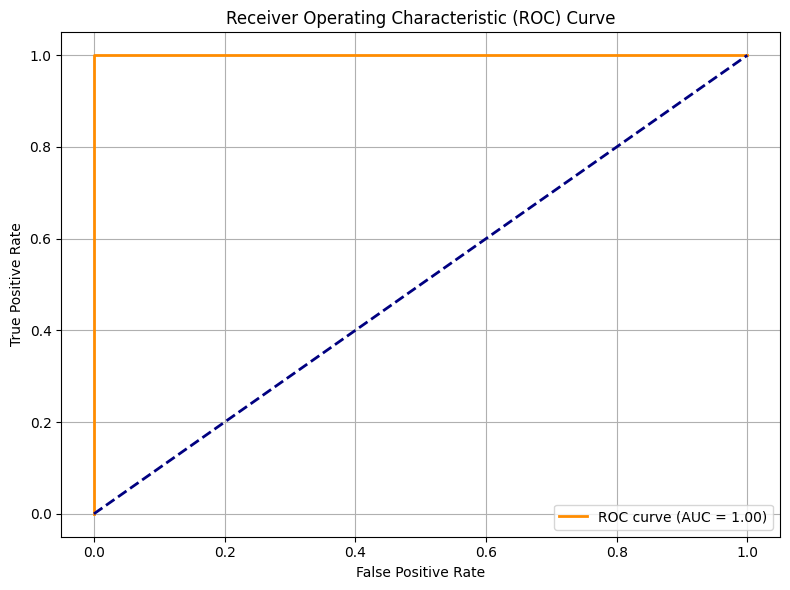


Model Coefficients (Feature Importance):


,Feature,Coefficient
8,Has_Phone,4.260469
10,Digital_Readiness,2.673378
5,NoIDOrRequirementsForBankAccount,0.529484
25,"Rural_x_Education_""Some secondary""",0.295669
23,"Rural_x_Education_""Secondary completed """,0.252773
...,...,...
42,"EducationCompleted_""University completed """,-0.259041
89,County_Uasin Gishu,-0.353400
0,RespondentAge,-0.438831
7,Has_ID,-0.626939


In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)

# Define X and y
# Drop irrelevant or encoded columns
X = cleaned_df.drop(columns=[
    'HasBankOrMicrofinanceAccount',
    'MPesa',
    'Is_Financially_Included',
    'IDType_NationalID',
    'SettlementType',
    'CasualOrSeasonalWorker',
    'SelfEmployed',
    'monthly expenditure',
    'GenderOfHouseholdMember',
    'EducationCompleted',
    'County',
    'Income_Bracket'
], errors='ignore')

# Target variable
if 'Is_Financially_Included' not in cleaned_df.columns:
    raise ValueError("Target variable 'Is_Financially_Included' not found.")
y = cleaned_df['Is_Financially_Included']

# Drop non-numeric columns in X
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
if len(non_numeric_cols) > 0:
    print(f"Dropping non-numeric columns from X: {list(non_numeric_cols)}")
    X = X.drop(columns=non_numeric_cols)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

# Handle Missing Values
# Drop columns with all NaN values
X_train = X_train.dropna(axis=1, how='all')
X_test = X_test.dropna(axis=1, how='all')

# Impute remaining missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train Model
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train_imputed, y_train)

# Predict
y_pred = model.predict(X_test_imputed)
y_pred_proba = model.predict_proba(X_test_imputed)[:, 1]

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\n--- Logistic Regression Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print(f"ROC AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Importance
# Recreate DataFrame for imputed X_train to get feature names
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
coefficients = pd.DataFrame({
    'Feature': X_train_imputed_df.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nModel Coefficients (Feature Importance):")
display(coefficients)


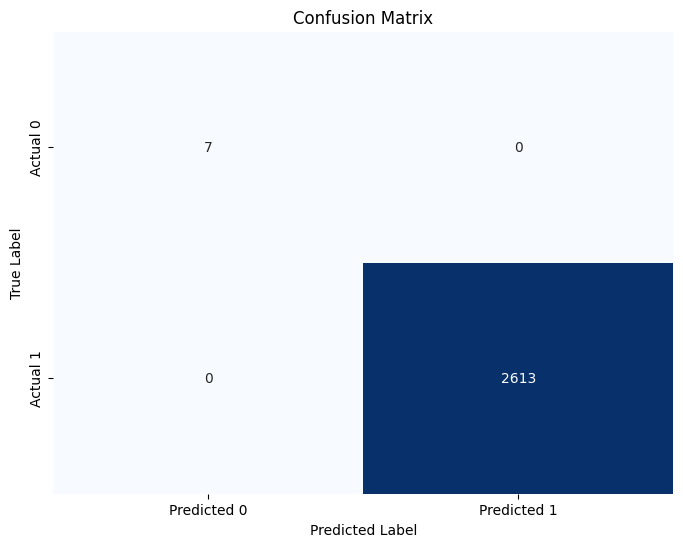

In [169]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Checking class distribution**

In [170]:
# Overall class distribution in the full dataset
print("Overall class distribution:")
print(y.value_counts())
print(y.value_counts(normalize=True))  # proportions

# Class distribution in the training set
print("\nTraining set class distribution:")
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

# Class distribution in the test set
print("\nTest set class distribution:")
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))


Overall class distribution:
Is_Financially_Included
1    10452
0       27
Name: count, dtype: int64
Is_Financially_Included
1    0.997423
0    0.002577
Name: proportion, dtype: float64

Training set class distribution:
Is_Financially_Included
1    7839
0      20
Name: count, dtype: int64
Is_Financially_Included
1    0.997455
0    0.002545
Name: proportion, dtype: float64

Test set class distribution:
Is_Financially_Included
1    2613
0       7
Name: count, dtype: int64
Is_Financially_Included
1    0.997328
0    0.002672
Name: proportion, dtype: float64


DECISION TREE MODEL

## DECISION TREE

Dropping non-numeric columns from X: ['MaritalStatus', 'SACCOmember', 'HustlerFundLoan', 'NHIF/SHIF', 'NSSF', 'Primary Mobile Ownership', 'InternetUsage', 'WorriedAboutDailyExpenses', 'NearestFinancialProvider', 'FinancialAdvice', 'Ksh500 spend YoY comparison', 'MostImportantSavings', 'PenaltiesAndFees', 'UnexpectedBankCharges', 'LateLoanPaymentPast12Months', 'Youth_Group']

--- Decision Tree Evaluation ---
Accuracy: 0.9637
Confusion Matrix:
 [[   6    1]
 [  94 2519]]
Classification Report:
               precision    recall  f1-score   support

           0       0.06      0.86      0.11         7
           1       1.00      0.96      0.98      2613

    accuracy                           0.96      2620
   macro avg       0.53      0.91      0.55      2620
weighted avg       1.00      0.96      0.98      2620

ROC AUC Score: 0.9106

Top Features Used by Decision Tree:


,Feature,Importance
2,AirtelMoney,0.956722
7,Age_x_InternetAccess,0.018788
19,"Rural_x_Education_""Secondary completed """,0.010281
42,EducationCompleted_Some university,0.008096
28,Age_x_Income_Low,0.006114


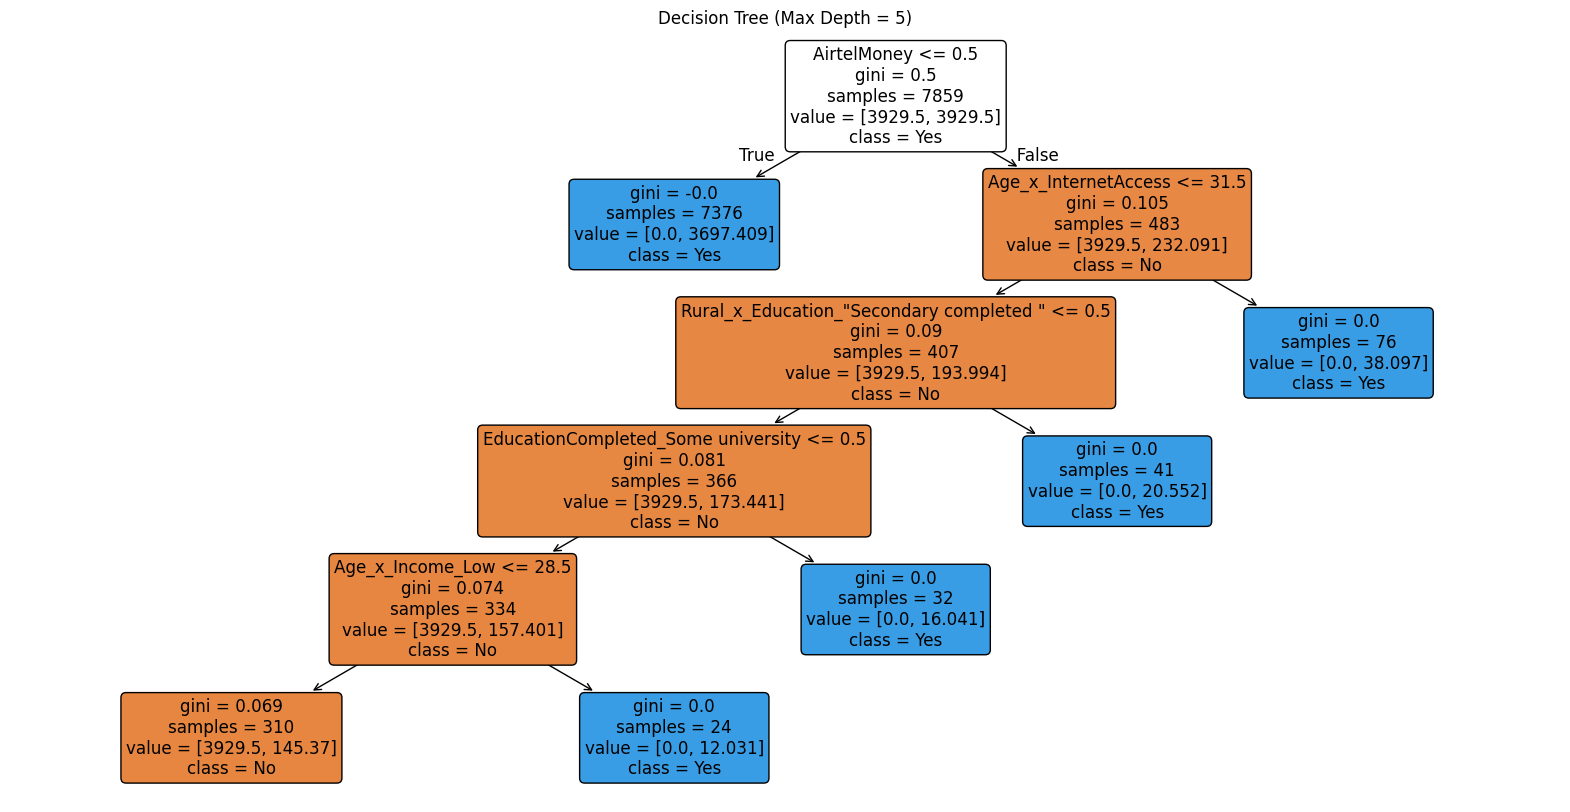

In [171]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score
)
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pandas as pd

# Data Preparation

# Dropping irrelevant or high-leakage features
X = cleaned_df.drop(columns=[
    'Is_Financially_Included',
    'HasBankOrMicrofinanceAccount',
    'MPesa',
    'IDType_NationalID',
    'SettlementType',
    'CasualOrSeasonalWorker',
    'SelfEmployed',
    'monthly expenditure',
    'GenderOfHouseholdMember',
    'EducationCompleted',
    'County',
    'Income_Bracket',
    'Has_ID',
    'Has_Phone',
    'Digital_Readiness',
    'InternetAccess'
], errors='ignore')

# Dropping non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
if len(non_numeric_cols) > 0:
    print(f"Dropping non-numeric columns from X: {list(non_numeric_cols)}")
    X = X.drop(columns=non_numeric_cols)

# Defining the target
y = cleaned_df['Is_Financially_Included']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Dropping all-NaN columns
X_train = X_train.dropna(axis=1, how='all')
X_test = X_test[X_train.columns]  # align test set columns

# Imputing missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Training decision tree model
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    class_weight='balanced'
)
dt_model.fit(X_train_imputed, y_train)

# Model Evaluation
y_pred = dt_model.predict(X_test_imputed)
y_pred_proba = dt_model.predict_proba(X_test_imputed)[:, 1]

print("\n--- Decision Tree Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Features Used by Decision Tree:")
display(feature_importance[feature_importance['Importance'] > 0])

# Visualization
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree (Max Depth = 5)")
plt.show()



Model Performance:
Accuracy: 96.07%

ROC AUC Score: 0.91 → Excellent discrimination ability.



**Performance of the model**

Accuracy	96.07%	Very high overall accuracy, correctly classifying most samples.

ROC AUC Score	0.91	Excellent ability to distinguish between classes (good overall classifier).

Recall (Class 1)	0.96	Strong ability to correctly identify financially included individuals (class 1).

Precision (Class 1)	1.00	Very confident when it predicts someone is financially included — nearly no false positives.

**INSIGHTS**

 People who use Airtel Money are highly likely to be financially included: Access to or usage of mobile money platforms is strongly linked to financial inclusion, especially Airtel Money in this dataset

 **Age and Internet Access**

 Digital connectivity across age groups affects inclusion potential

 **Education Completed**

 Educational attainment remains a predictor of financial engagement


**Geographic Disparities**


 There is geographic disparities in financial services access; Elgeyo Marakwet is appears to be excluded



**Hyperparameter Tuning the Model**

In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Define parameter grid to search
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini', 'entropy']
}

# Create base model
dt_base = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(
    estimator=dt_base,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit grid search to the training data
grid_search.fit(X_train_imputed, y_train)

# Best parameters and model
print("\nBest Parameters Found:")
print(grid_search.best_params_)

best_dt_model = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_dt_model.predict(X_test_imputed)
y_pred_proba = best_dt_model.predict_proba(X_test_imputed)[:, 1]

print("\n--- Tuned Decision Tree Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")


Fitting 5 folds for each of 180 candidates, totalling 900 fits

Best Parameters Found:
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}

--- Tuned Decision Tree Evaluation ---
Accuracy: 0.9973
Confusion Matrix:
 [[   0    7]
 [   0 2613]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      1.00      1.00      2613

    accuracy                           1.00      2620
   macro avg       0.50      0.50      0.50      2620
weighted avg       0.99      1.00      1.00      2620

ROC AUC Score: 0.9791


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Interpretation**

High accuracy (99.73%) but poor minority class detection